# **DATA WRANGLING AND UNIVARIATE DATA ANALYSIS**

The dataset used in this case is the Kaggle Credit Score Classification dataset that can be accessed in this link https://www.kaggle.com/datasets/parisrohan/credit-score-classification 

The task at hand is to build a machine learning model that can classify the credit score of clients of a global finance company based on their credit-related information that the company has gathered over the yeas (along with other information such as their basic bank details). The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.


**Installing Dependencies**

The PyCaret library will be used for part of the data transformation process as well as to bulid the machine learning based model. In order to utilize PyCaret dependencies in this environment, some installations steps needs to be initiated prior to that:

In [1]:
!pip install --use-deprecated=legacy-resolver pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing bac

In [2]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Data Setup and Initial Exploratory Data Analysis**

In [4]:
import numpy as np
import pandas as pd

**Get Training Dataset**

The dataset used in this case is stored as a Google Drive file with a universally accesible link for convenience and is retrieved via the wget command. There training and testing dataset are stored as seperate files and will be treated as seperate dataframes in this environment as well

In [5]:
!wget --no-check-certificate \
    'https://docs.google.com/uc?export=download&id=1o3yzb-qYCKHzObDsja796FowI6hmJcR2' \
    -O train.csv

--2023-01-15 23:42:54--  https://docs.google.com/uc?export=download&id=1o3yzb-qYCKHzObDsja796FowI6hmJcR2
Resolving docs.google.com (docs.google.com)... 108.177.11.100, 108.177.11.113, 108.177.11.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8mlh1shvpqputcfqgu79lql52ge8ap44/1673826150000/17040148015727230433/*/1o3yzb-qYCKHzObDsja796FowI6hmJcR2?e=download&uuid=51b454d4-dbf1-4d15-95a8-c0e365e44f98 [following]
--2023-01-15 23:42:58--  https://doc-10-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8mlh1shvpqputcfqgu79lql52ge8ap44/1673826150000/17040148015727230433/*/1o3yzb-qYCKHzObDsja796FowI6hmJcR2?e=download&uuid=51b454d4-dbf1-4d15-95a8-c0e365e44f98
Resolving doc-10-2s-docs.googleusercontent.com (doc-10-2s-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:

**Get Testing Dataset**

In [6]:
!wget --no-check-certificate \
    'https://docs.google.com/uc?export=download&id=1C2YPjjzY_WWX2b8q_wxLvIAWP1jk11CY' \
    -O test.csv

--2023-01-15 23:42:59--  https://docs.google.com/uc?export=download&id=1C2YPjjzY_WWX2b8q_wxLvIAWP1jk11CY
Resolving docs.google.com (docs.google.com)... 108.177.11.100, 108.177.11.113, 108.177.11.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/emk2kp8meg24n08271cbc493m3134ttf/1673826150000/17040148015727230433/*/1C2YPjjzY_WWX2b8q_wxLvIAWP1jk11CY?e=download&uuid=c6fb8f68-5dd5-42bb-b3c5-b1e59ec0210c [following]
--2023-01-15 23:43:01--  https://doc-0g-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/emk2kp8meg24n08271cbc493m3134ttf/1673826150000/17040148015727230433/*/1C2YPjjzY_WWX2b8q_wxLvIAWP1jk11CY?e=download&uuid=c6fb8f68-5dd5-42bb-b3c5-b1e59ec0210c
Resolving doc-0g-2s-docs.googleusercontent.com (doc-0g-2s-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:

**Set Dataframe Options**

As it is likely that the data cleaning and data transformation step will involve and result in dealing with a lot of columns, the maximum number columns displayed for pandas dataframe objects is set to 60

In [7]:
pd.options.display.max_columns = 60
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**View Sample Rows and Data Shape**

In [8]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [9]:
df_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


Even after just looking at the first few rows of both the training and testing datasets, it is apparent that some columns/attributes (such as the 'Name', 'Occupation','SSN', 'Annual Income and other columns related to the number of credit lines or accounts a client has) is fully dependent on the customers themselves which is represented by the 'Customer_ID' column whereas each unique data entry in the dataset represented by the ID column is a client's credit related details for a given month of that particular year. Hence if there are columns not dependent on the primary key in this dataset (which in this case is the 'ID' column), then it is evident that the dataset contains partial dependencies and hence the dataset is not in normal form. It is a neccesity for machine learning models to be trained on datasets in unnormalized forms (as one could imagine the impracticalities of having to train a predictive model on multible tables related to one another). However when a dataset exists in unnormalized form, there is a tendency for a multitude of anomalies to occur such as the ones that exist in this dataset. For columns that are fully dependent on the 'Customer_ID' column for example such as the customer's/client's name, the customer's name should be the same for all entries that share the same customer ID, but it appears there are missing values in the 'Name' column even when all other columns that shares the same customer ID value have the same name. This is also true for other columns that are fully dependent on the 'Customer_ID' column such as 'Annual_Income', 'Occupation' and 'SSN' (representing the social security number of each client), which shouldn't happen if the dataset is in normalized form. Given this fact, cleaning datasets in unnormalized form should use a different approach than the conventional univariate approach of replacing anomalous or missing values by a measure of central tendency of the entire column. Instead, it makes more sense to iterate through a subset of the columns dependent on the customer ID that shares the same value in the 'Customer_ID'column and replace any value that takes on a value different to the mode of the values in that subset by the mode of the subset itself. Hence, what would result from this is that all partially dependent attributes in the dataset that is fully dependent on the 'Customer_ID' column will share the same value that corresponds to each unique customer ID value

In [10]:
print("Training Data Shape:",df.shape)
print("Testing Data Shape:",df_test.shape)
print("\nProportion of Training to Testing Data =",'{:1.2f}'.format(df.shape[0]/df_test.shape[0]))

Training Data Shape: (100000, 28)
Testing Data Shape: (50000, 27)

Proportion of Training to Testing Data = 2.00


**Check Column Data Types**

In [11]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

**Check Number of Unique Values per Feature**

In [12]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

There are also anomalies pertaining to the datatypes of the attributes listed in this dataset. There are attributes such as the 'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payments', 'Changed_Credit_Limit', 'Outstanding_Debt' and 'Amount_invested_monthly' columns that are listed as objects but intuitively should be in numeric form. This is confirmed by the number of unique values these attributes have which range from 434 to 91049 values (way too high for categorical/object attributes). Looking back at the first few rows of the training and testing datasets, there are values in the 'Age' column taking on values such as '24_' and as such, it is likely that these numeric columns listed of objects contain non-numeric characters in some of it's row which is the reason why they are listed as object columns instead of numeric ones. 

**Check for Missing Values**

In [13]:
df.isna().sum()[df.isna().sum() > 0]/df.shape[0]*100

Name                        9.985
Monthly_Inhand_Salary      15.002
Type_of_Loan               11.408
Num_of_Delayed_Payment      7.002
Num_Credit_Inquiries        1.965
Credit_History_Age          9.030
Amount_invested_monthly     4.479
Monthly_Balance             1.200
dtype: float64

In [14]:
df_test.isna().sum()[df_test.isna().sum() > 0]/df_test.shape[0]*100

Name                       10.030
Monthly_Inhand_Salary      14.996
Type_of_Loan               11.408
Num_of_Delayed_Payment      6.996
Num_Credit_Inquiries        2.070
Credit_History_Age          8.940
Amount_invested_monthly     4.542
Monthly_Balance             1.124
dtype: float64

The columns containing missing values are either columns that are fully dependent on the 'Customer_ID' column such as 'Name', 'Monthly_Inhand_Salary'. and 'Type_of_Loan' as well as others that aren't. Dealing with the missing values in these columns will not only be based on these dependencies but also on the nature of the columns themselves

**Target Variable - Credit Score**

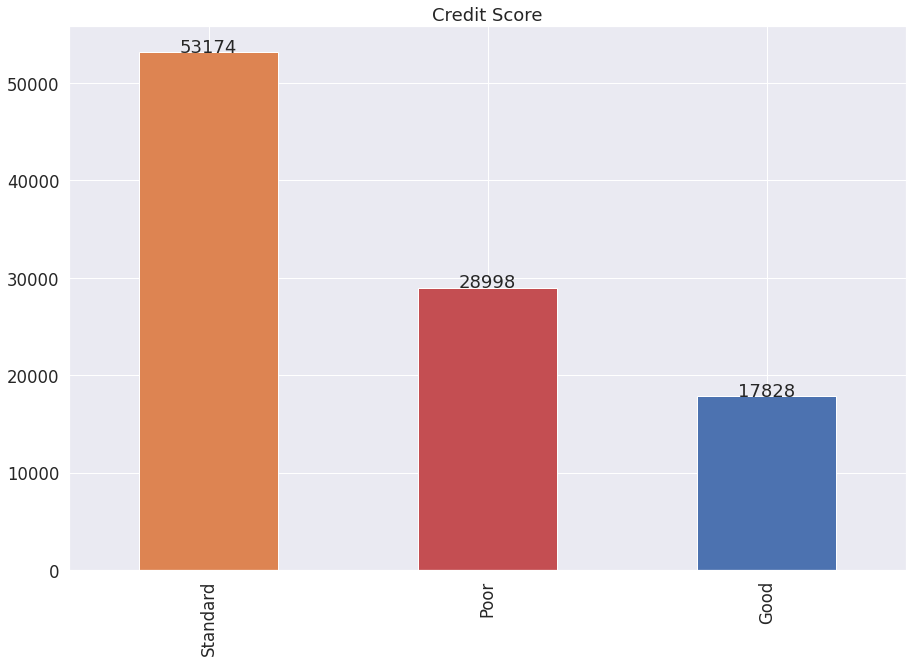

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

df["Credit_Score"].value_counts().plot(kind='bar', color=['C1', 'C3', 'C0'], figsize=(15, 10))
# 'C7' is Grey
# plt.xlabel("Loan Approval", labelpad=14)
# plt.ylabel("Count of Records", labelpad=14)
plt.title("Credit Score")
df["Credit_Score"].value_counts()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(df["Credit_Score"].value_counts().index, df["Credit_Score"].value_counts().values)

There are 3 unique values in the target variable 'Credit_Score' for this dataset, with most of them being 'Standard' and fewer belonging to the 'Poor' or 'Good' label. Thus, this is clearly an imbalanced dataset and imbalance handling methods will be applied prior to training the machine learning based classifier (in the form of SMOTE) 

## **Data Cleaning and Univariate Analysis**

In order to parse out the non-numeric characters in column attributes that are meant to be listed as numeric columns, the parse_number() in-built method that is available in the tidyverse R Library is used. In order to utilize R programming code snippets in a Google Colab Python environment, the rpy2 dependencies will need to be installed and loaded before that (in particular the older 3.5.1 version)

**Parse Numeric Data Listed as Objects into Numbers using R Magic**

In [16]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=310200 sha256=02c67f8dd59e2c280dc57b5f43eb4c3a2a905fb1c75c2a3a45f26e44f44f61e8
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [17]:
%load_ext rpy2.ipython

In [18]:
%%R
library(tidyverse)
library(lubridate)


✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’



    date, intersect, setdiff, union




After the tidyverse library is imported, the "Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly" will be selected and parsed using the parse_number method. Once this step is completed, a new dataframe where these columns will be in numeric form is created

In [19]:
%%R
train <- read_csv("train.csv")
test <- read_csv("test.csv")
character_columns_train <- train[, sapply(train, class) == "character"]
character_columns_test <- test[, sapply(test, class) == "character"]
number_columns_train <- character_columns_train %>%
    select("Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly")
number_columns_test <- character_columns_test %>%
    select("Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly")
number_parsed_train <- sapply(number_columns_train, parse_number) %>%
    as_data_frame()
number_parsed_test <- sapply(number_columns_test, parse_number) %>%
    as_data_frame()

Rows: 100000 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income,...
dbl  (9): Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interes...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 50000 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income,...
dbl  (9): Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interes...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


row col expected actual
  3  -- a number      _
 66  -- a number      _
 67  -- a number      _
110  -- a number      _
111  -- a number      _
... ... ........ ......
See problems(...) for more details.


row col expected actual
 34  -- a number      _
106  -- a number      _
190  -- a number      _
264  -- a number      _
265  -- a number      _
... ... ........ ......
See problems(...) for more details.




In [20]:
%%R
train_parsed <- train %>%
    select(-"Age", -"Annual_Income", -"Num_of_Loan", -"Num_of_Delayed_Payment", -"Changed_Credit_Limit", -"Outstanding_Debt", -"Amount_invested_monthly") %>%
    bind_cols(number_parsed_train)
test_parsed <- test %>%
    select(-"Age", -"Annual_Income", -"Num_of_Loan", -"Num_of_Delayed_Payment", -"Changed_Credit_Limit", -"Outstanding_Debt", -"Amount_invested_monthly") %>%
    bind_cols(number_parsed_test)
str(train_parsed)

tibble [100,000 × 28] (S3: tbl_df/tbl/data.frame)
 $ ID                      : chr [1:100000] "0x1602" "0x1603" "0x1604" "0x1605" ...
 $ Customer_ID             : chr [1:100000] "CUS_0xd40" "CUS_0xd40" "CUS_0xd40" "CUS_0xd40" ...
 $ Month                   : chr [1:100000] "January" "February" "March" "April" ...
 $ Name                    : chr [1:100000] "Aaron Maashoh" "Aaron Maashoh" "Aaron Maashoh" "Aaron Maashoh" ...
 $ SSN                     : chr [1:100000] "821-00-0265" "821-00-0265" "821-00-0265" "821-00-0265" ...
 $ Occupation              : chr [1:100000] "Scientist" "Scientist" "Scientist" "Scientist" ...
 $ Monthly_Inhand_Salary   : num [1:100000] 1825 NA NA NA 1825 ...
 $ Num_Bank_Accounts       : num [1:100000] 3 3 3 3 3 3 3 3 2 2 ...
 $ Num_Credit_Card         : num [1:100000] 4 4 4 4 4 4 4 4 4 4 ...
 $ Interest_Rate           : num [1:100000] 3 3 3 3 3 3 3 3 6 6 ...
 $ Type_of_Loan            : chr [1:100000] "Auto Loan, Credit-Builder Loan, Personal Loan, and Home E

In [21]:
%%R
str(test_parsed)

tibble [50,000 × 27] (S3: tbl_df/tbl/data.frame)
 $ ID                      : chr [1:50000] "0x160a" "0x160b" "0x160c" "0x160d" ...
 $ Customer_ID             : chr [1:50000] "CUS_0xd40" "CUS_0xd40" "CUS_0xd40" "CUS_0xd40" ...
 $ Month                   : chr [1:50000] "September" "October" "November" "December" ...
 $ Name                    : chr [1:50000] "Aaron Maashoh" "Aaron Maashoh" "Aaron Maashoh" "Aaron Maashoh" ...
 $ SSN                     : chr [1:50000] "821-00-0265" "821-00-0265" "821-00-0265" "821-00-0265" ...
 $ Occupation              : chr [1:50000] "Scientist" "Scientist" "Scientist" "Scientist" ...
 $ Monthly_Inhand_Salary   : num [1:50000] 1825 1825 1825 NA 3038 ...
 $ Num_Bank_Accounts       : num [1:50000] 3 3 3 3 2 2 2 2 1 1 ...
 $ Num_Credit_Card         : num [1:50000] 4 4 4 4 4 4 4 4 5 5 ...
 $ Interest_Rate           : num [1:50000] 3 3 3 3 6 6 6 6 8 8 ...
 $ Type_of_Loan            : chr [1:50000] "Auto Loan, Credit-Builder Loan, Personal Loan, and Home Eq

In [22]:
train_parsed = %R train_parsed
train_parsed = train_parsed[list(df.columns)]
df = train_parsed
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
2,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,NaN,11.27,4.0,Good,809.98,31.944960,None,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good


In [23]:
test_parsed = %R test_parsed
test_parsed = test_parsed[list(df_test.columns)]
df_test = test_parsed
df_test.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
1,0x160a,CUS_0xd40,September,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
2,0x160b,CUS_0xd40,October,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,9.0,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
3,0x160c,CUS_0xd40,November,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,4.0,12.27,4.0,Good,809.98,33.811894,None,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446


**Age**

The 'Age' column is one of the special cases where anomalies exist (such as a client having an age of -500) but these anomalies can't simply be replaced by the mode of age values for the subset of the 'Age' column having the same customer ID values. This is because a customer could well and in fact very likely to have their birthdays in any one of the months listed in the one of their data entries in which case their age will increase by one such as clients who have their birthdays in June and will turn 28 in that month should have their age listed as 27,27,27,27,27,28,28,28 for example. Replacing it with the mode value will replace all of it with the value 27, which is incorrect. So the right approach will be to replace the anomalous values with a null value and then apply the forward fill method to replace the missing values with the previous value in the column subset. In this case, an anomalous value is defined as any values that deviates more than one from the median (because in a span of months in a year, a person can only increase his/her age once)

In [24]:
def age_outlier(data):
  df_temp = data.copy()
  df_temp[df_temp > df_temp.median()+1] = None
  df_temp[df_temp < df_temp.median()-1] = None
  return df_temp

df['Age'] = df.groupby(['Customer_ID'], sort=False)['Age'].apply(lambda x: age_outlier(x).ffill().bfill())
df_test['Age'] = df_test.groupby(['Customer_ID'], sort=False)['Age'].apply(lambda x: age_outlier(x).ffill().bfill())

Skew :  0.156
Kurtosis :  -0.927


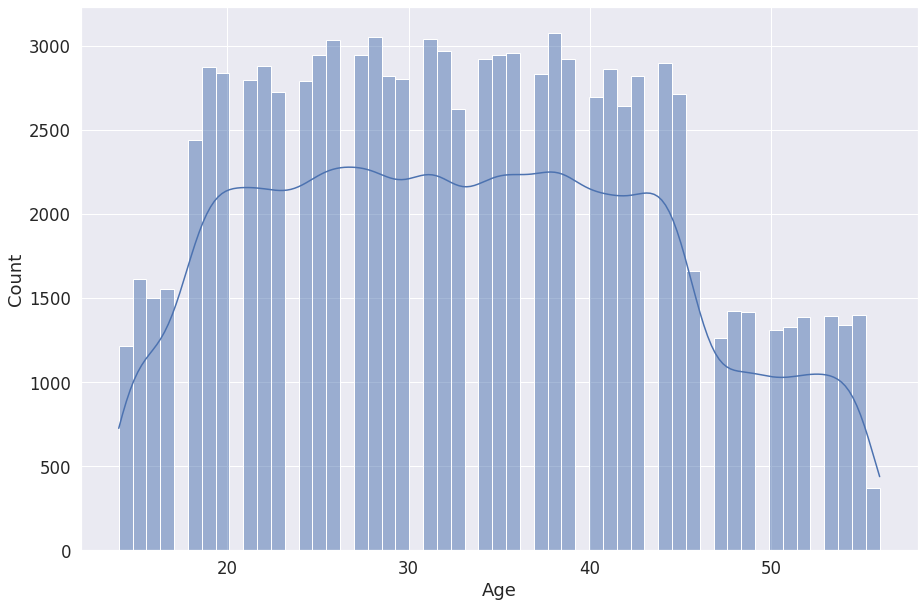

In [25]:
print("Skew : ", '{:1.3f}'.format(df['Age'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Age'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Age'], kde=True, ax=ax)
plt.show()

**Occupation**

The 'Occupation' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset.

Furthermore, there also exist another anomaly where a unique customer ID all share a "________" value listed in the 'Occupation' column, this anomaly is addressed by replacing that particular value with "Not_Specified".

In [26]:
def remove_nonmode(data):
  df_temp = data.copy()
  df_temp[df_temp != df_temp.mode()[0]] = None
  return df_temp

df['Occupation'] = df.groupby(['Customer_ID'], sort=False)['Occupation'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df['Occupation'].replace("_______","Not_Specified",inplace=True)

df_test['Occupation'] = df_test.groupby(['Customer_ID'], sort=False)['Occupation'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Occupation'].replace("_______","Not_Specified",inplace=True)

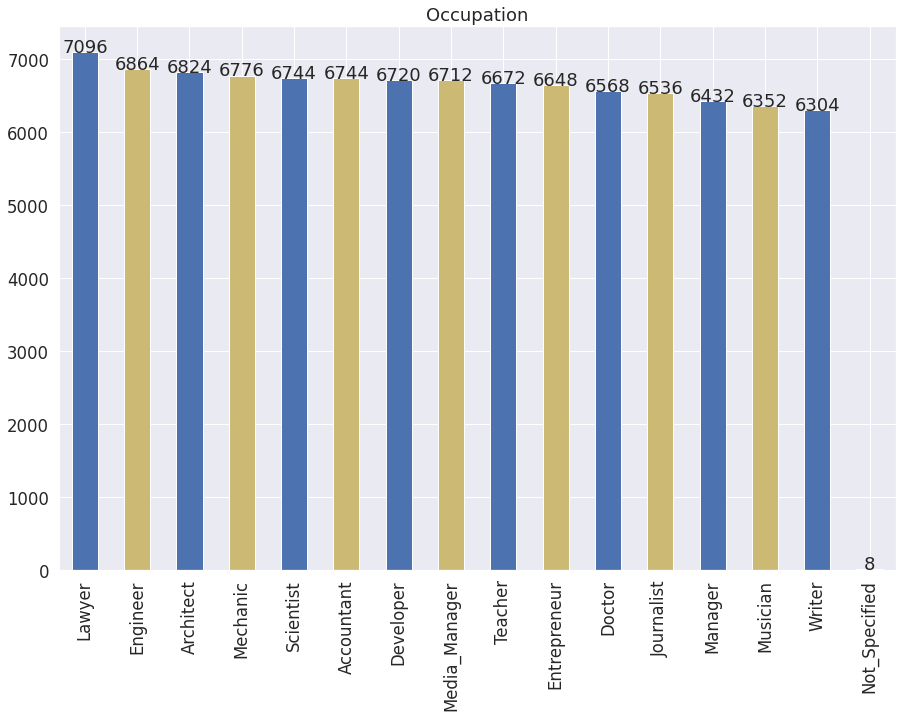

In [27]:
df["Occupation"].value_counts().plot(kind='bar', color=['C0', 'C8'], figsize=(15, 10))
plt.title("Occupation")
addlabels(df["Occupation"].value_counts().index, df["Occupation"].value_counts().values)

**Annual Income**

The 'Annual_Income' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset

In [28]:
df['Annual_Income'] = df.groupby(['Customer_ID'], sort=False)['Annual_Income'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Annual_Income'] = df_test.groupby(['Customer_ID'], sort=False)['Annual_Income'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))

Skew :  1.130
Kurtosis :  0.608


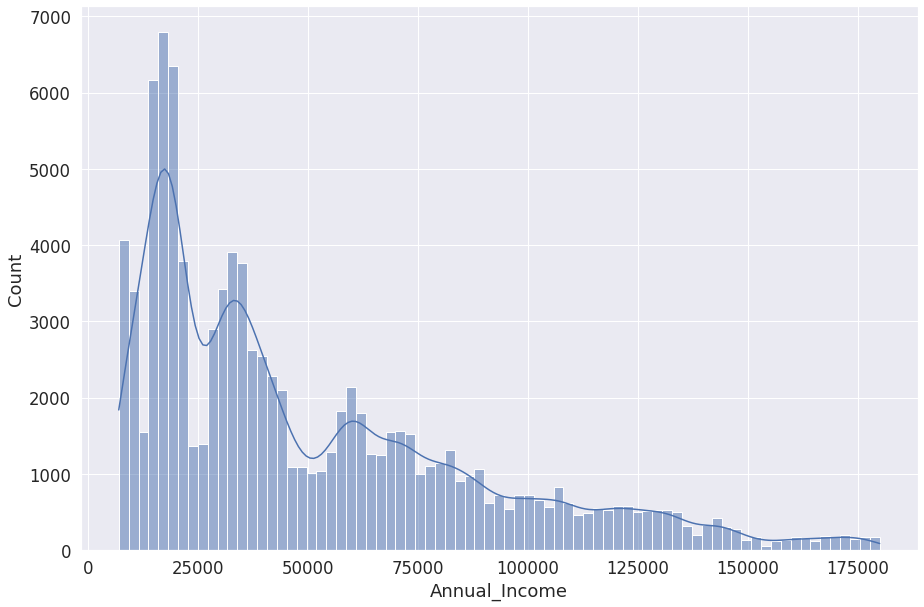

In [29]:
print("Skew : ", '{:1.3f}'.format(df['Annual_Income'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Annual_Income'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Annual_Income'], kde=True, ax=ax)
plt.show()

**Monthly Inhand Salary**

The 'Monthly_Inhand_Salary' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset

In [30]:
df['Monthly_Inhand_Salary'] = df.groupby(['Customer_ID'], sort=False)['Monthly_Inhand_Salary'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Monthly_Inhand_Salary'] = df_test.groupby(['Customer_ID'], sort=False)['Monthly_Inhand_Salary'].apply(lambda x: x.ffill().bfill())

Skew :  1.130
Kurtosis :  0.622


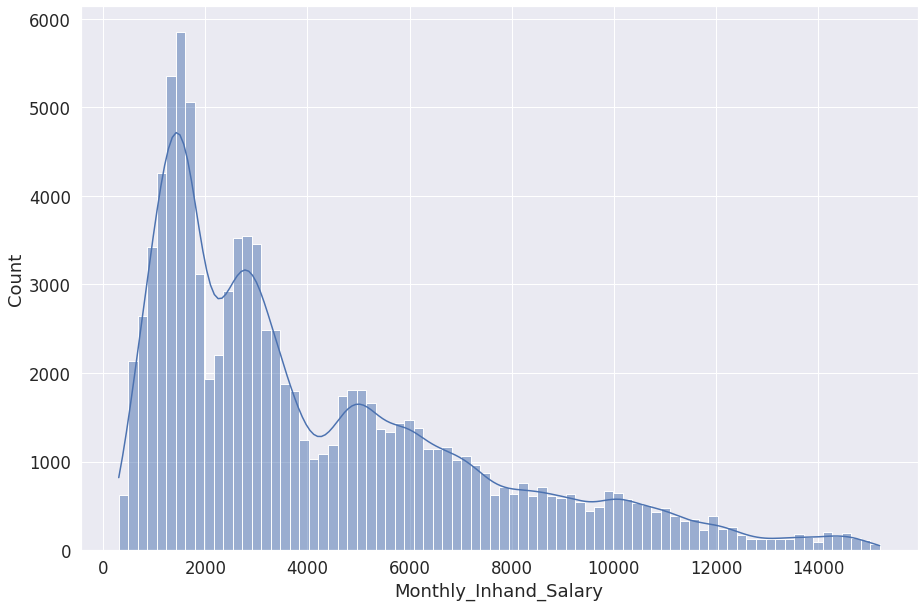

In [31]:
print("Skew : ", '{:1.3f}'.format(df['Monthly_Inhand_Salary'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Monthly_Inhand_Salary'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Monthly_Inhand_Salary'], kde=True, ax=ax)
plt.show()

**Number of Bank Accounts**

The 'Num_Bank_Accounts' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset

In [32]:
df['Num_Bank_Accounts'] = df.groupby(['Customer_ID'], sort=False)['Num_Bank_Accounts'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Num_Bank_Accounts'] = df_test.groupby(['Customer_ID'], sort=False)['Num_Bank_Accounts'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))

In [33]:
df['Num_Bank_Accounts'].nunique()

12

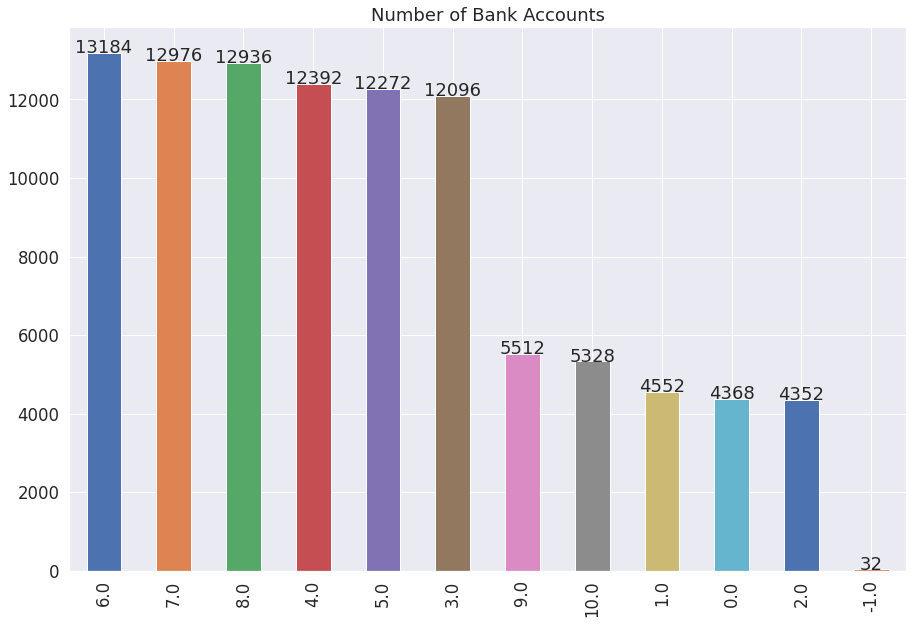

In [34]:
df["Num_Bank_Accounts"].value_counts().plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], figsize=(15, 10))
plt.title("Number of Bank Accounts")
addlabels(df["Num_Bank_Accounts"].value_counts().index, df["Num_Bank_Accounts"].value_counts().values)

**Number of Credit Cards**

The 'Num_Credit_Card' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset

In [35]:
df['Num_Credit_Card'] = df.groupby(['Customer_ID'], sort=False)['Num_Credit_Card'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Num_Credit_Card'] = df_test.groupby(['Customer_ID'], sort=False)['Num_Credit_Card'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))

In [36]:
df['Num_Credit_Card'].nunique()

12

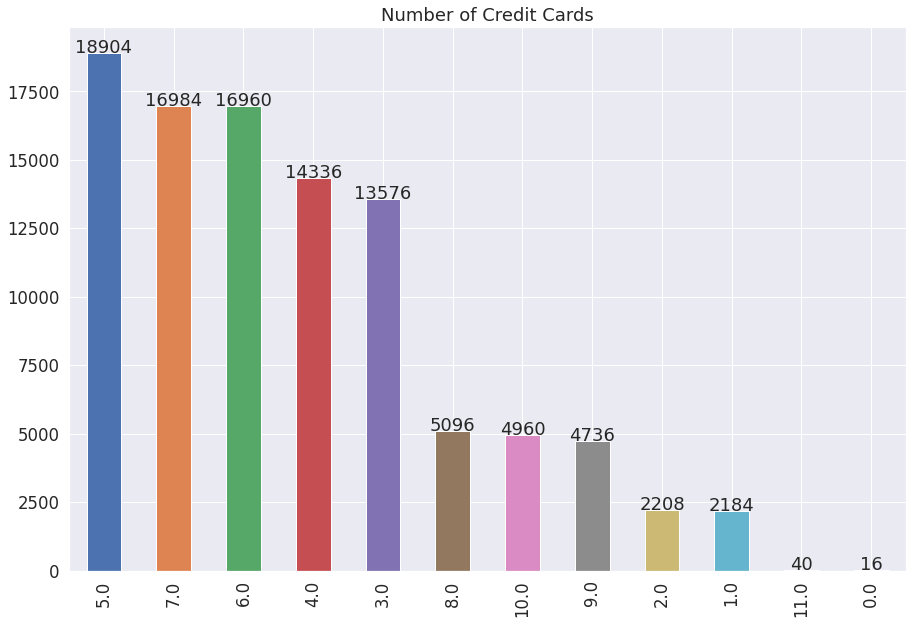

In [37]:
df["Num_Credit_Card"].value_counts().plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], figsize=(15, 10))
plt.title("Number of Credit Cards")
addlabels(df["Num_Credit_Card"].value_counts().index, df["Num_Credit_Card"].value_counts().values)

**Interest Rate**

The 'Interest_Rate' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset

In [38]:
df['Interest_Rate'] = df.groupby(['Customer_ID'], sort=False)['Interest_Rate'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Interest_Rate'] = df_test.groupby(['Customer_ID'], sort=False)['Interest_Rate'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))

In [39]:
df['Interest_Rate'].nunique()

34

Skew :  0.496
Kurtosis :  -0.682


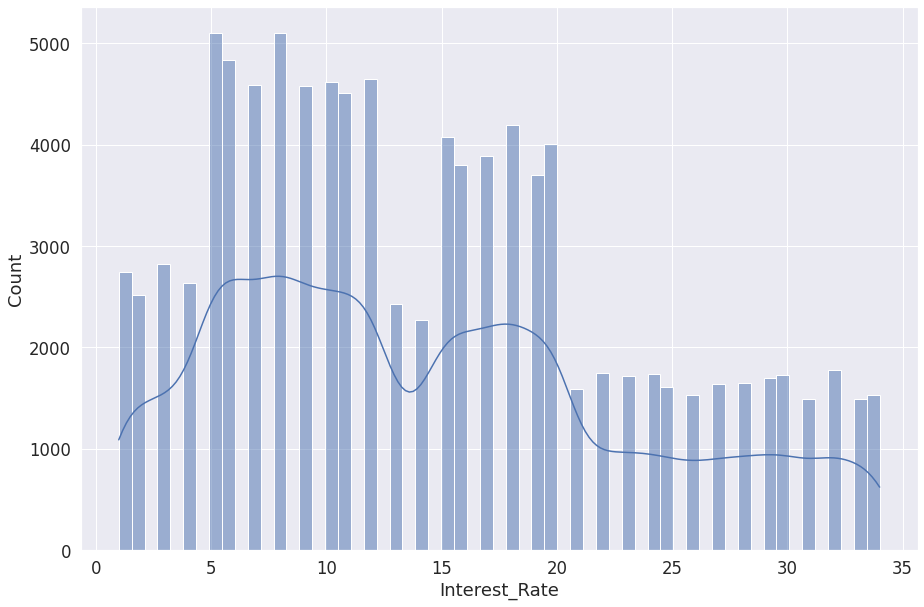

In [40]:
print("Skew : ", '{:1.3f}'.format(df['Interest_Rate'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Interest_Rate'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Interest_Rate'], kde=True, ax=ax)
plt.show()

**Number of Loans**

The 'Num_of_Loan' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset

In [41]:
df['Num_of_Loan'] = df.groupby(['Customer_ID'], sort=False)['Num_of_Loan'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Num_of_Loan'] = df_test.groupby(['Customer_ID'], sort=False)['Num_of_Loan'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))

In [42]:
df['Num_of_Loan'].nunique()

10

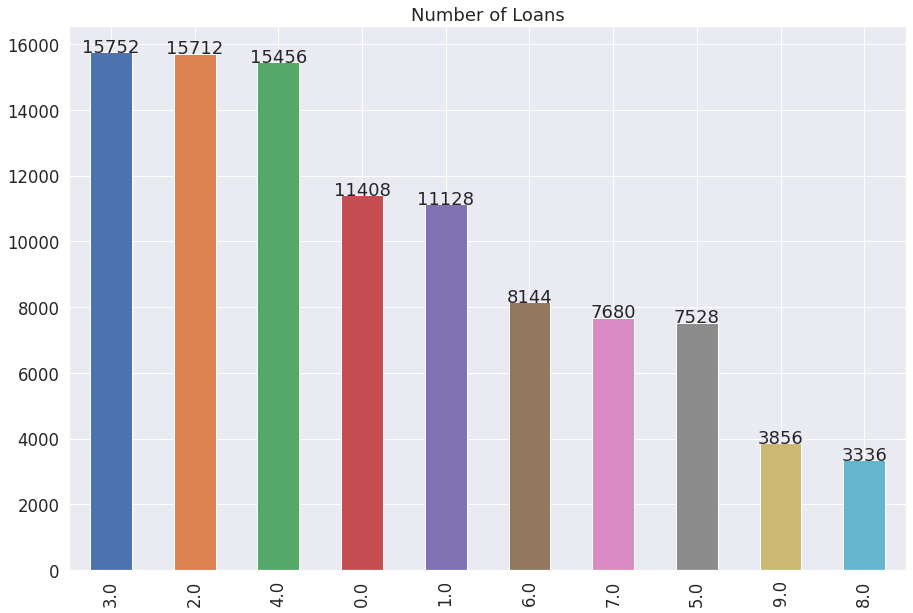

In [43]:
df["Num_of_Loan"].value_counts().plot(kind='bar', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], figsize=(15, 10))
plt.title("Number of Loans")
addlabels(df["Num_of_Loan"].value_counts().index, df["Num_of_Loan"].value_counts().values)

**Type of Loan**

The 'Type_of_Loan' column is another special case in this unnormalized dataset in that it is a multi-value attribute (which also shouldn't exist were the dataset is in normal form). The problematic nature of this is apparent when the count of each unique value of this column is displayed:

In [44]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In reality, there are much fewer than 6260 unique type of loans if the information detailed in this attribute is expressed in a more way. To deal with this, the missing values is replaced with 'None' (which literally implies there are no loans associated with this data entry) and since every unique loan for each data entry in this column is seperated by a comma followed by a whitepace ", " a str.split() method is used to convert the value of the attribute from a single string to a list of string. The explode method is then used to decompose the multivalued row into multiple rows containing a single value for each unique value which is then decomposed to different columns through one-hot encoding and aggregated. This effectively transformed the 'Type_of_Loan' column in the dataset into 9 different columns (each different column represents a unique loan type value) with each of these value taking up a value of either one or zero depending if a data entry has a loan that corresponds to the attribute:

In [45]:
def split_loan_type(data):
  df_temp = data.copy()
  df_temp['Type_of_Loan'].fillna('None', inplace=True)
  df_temp['Type_of_Loan'] = df_temp['Type_of_Loan'].apply(lambda x: x.replace("and ", ""))
  df_temp["Type_of_Loan"] = df_temp["Type_of_Loan"].str.split(", ")
  df_temp = pd.get_dummies(df_temp.explode("Type_of_Loan"), columns=['Type_of_Loan'], prefix="", prefix_sep="", drop_first=True)
  df_temp['Credit-Builder Loan'] = df_temp.groupby(['Customer_ID'], sort=False)['Credit-Builder Loan'].apply(lambda x: x.replace(0,x.max()))
  df_temp['Debt Consolidation Loan'] = df_temp.groupby(['Customer_ID'], sort=False)['Debt Consolidation Loan'].apply(lambda x: x.replace(0,x.max()))
  df_temp['Home Equity Loan'] = df_temp.groupby(['Customer_ID'], sort=False)['Home Equity Loan'].apply(lambda x: x.replace(0,x.max()))
  df_temp['Mortgage Loan'] = df_temp.groupby(['Customer_ID'], sort=False)['Mortgage Loan'].apply(lambda x: x.replace(0,x.max()))
  df_temp['None'] = df_temp.groupby(['Customer_ID'], sort=False)['None'].apply(lambda x: x.replace(0,x.max()))
  df_temp['Not Specified'] = df_temp.groupby(['Customer_ID'], sort=False)['Not Specified'].apply(lambda x: x.replace(0,x.max()))
  df_temp['Payday Loan'] = df_temp.groupby(['Customer_ID'], sort=False)['Payday Loan'].apply(lambda x: x.replace(0,x.max()))
  df_temp['Personal Loan'] = df_temp.groupby(['Customer_ID'], sort=False)['Personal Loan'].apply(lambda x: x.replace(0,x.max()))
  df_temp['Student Loan'] = df_temp.groupby(['Customer_ID'], sort=False)['Student Loan'].apply(lambda x: x.replace(0,x.max()))
  df_temp.drop_duplicates(inplace=True)
  return df_temp

df = split_loan_type(df)
df_test = split_loan_type(df_test)

**Credit Builder Loan**

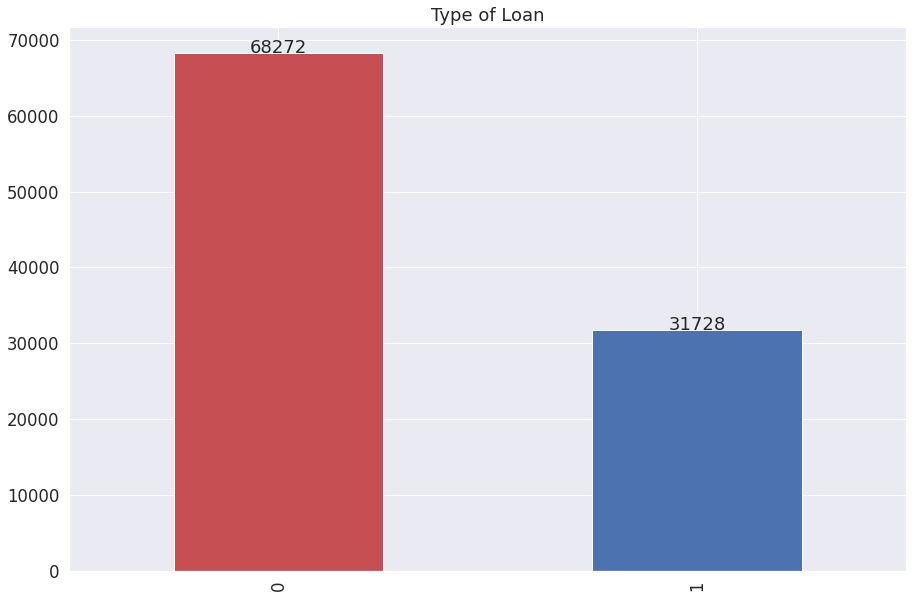

In [46]:
df["Credit-Builder Loan"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Type of Loan")
addlabels(df["Credit-Builder Loan"].value_counts().index, df["Credit-Builder Loan"].value_counts().values)

**Debt Consolidation Loan**

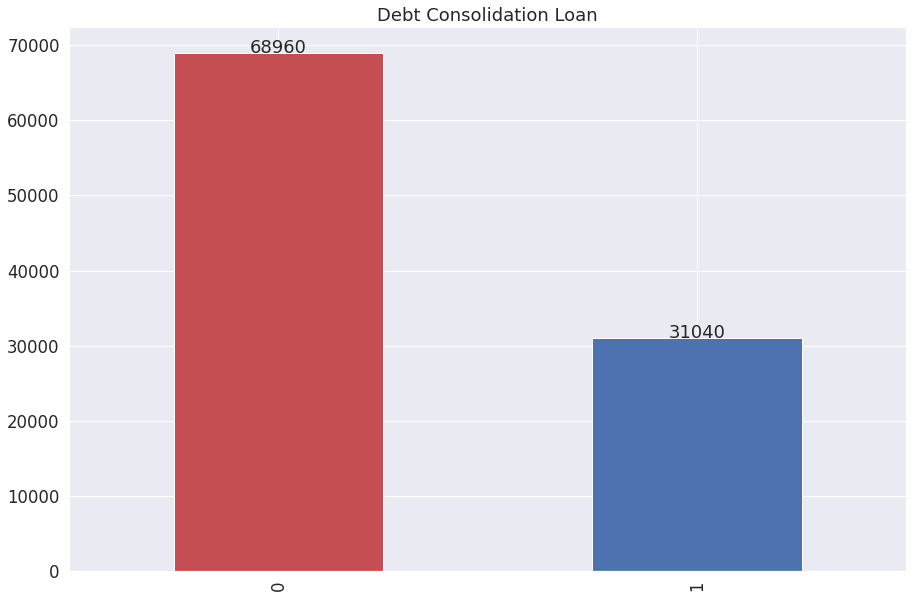

In [47]:
df["Debt Consolidation Loan"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Debt Consolidation Loan")
addlabels(df["Debt Consolidation Loan"].value_counts().index, df["Debt Consolidation Loan"].value_counts().values)

**Home Equity Loan**

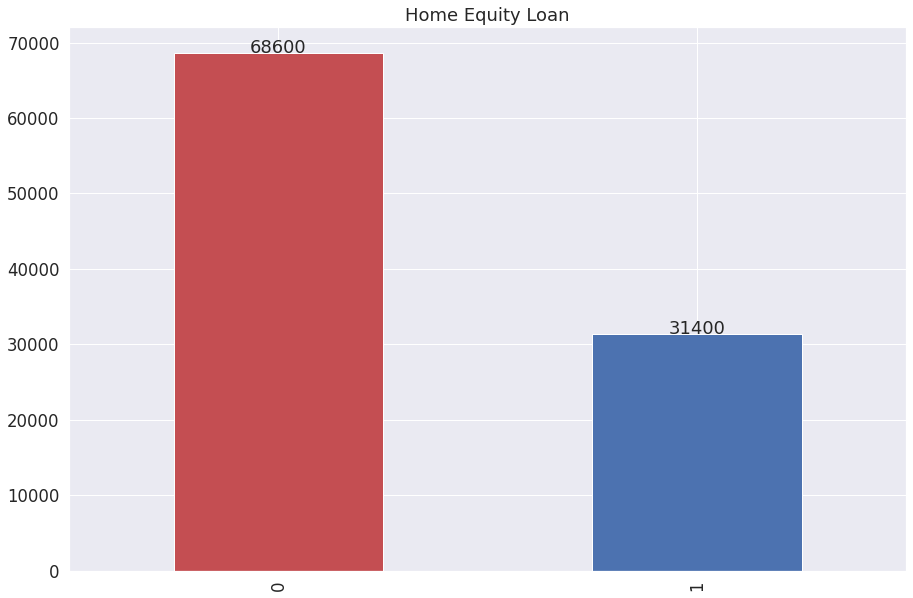

In [48]:
df["Home Equity Loan"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Home Equity Loan")
addlabels(df["Home Equity Loan"].value_counts().index, df["Home Equity Loan"].value_counts().values)

**Mortgage Loan**

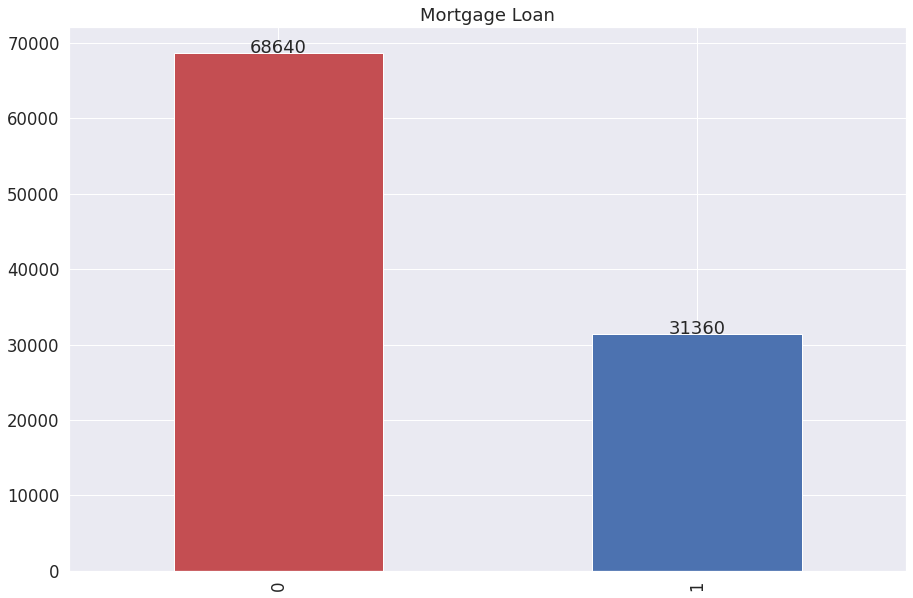

In [49]:
df["Mortgage Loan"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Mortgage Loan")
addlabels(df["Mortgage Loan"].value_counts().index, df["Mortgage Loan"].value_counts().values)

**No Known Loans**

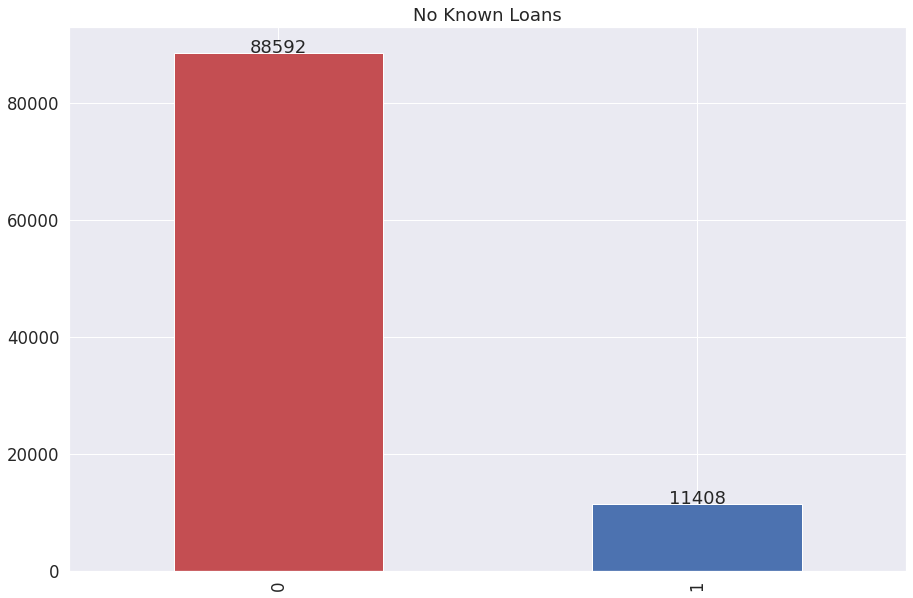

In [50]:
df["None"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("No Known Loans")
addlabels(df["None"].value_counts().index, df["None"].value_counts().values)

**Loan Not Specified**

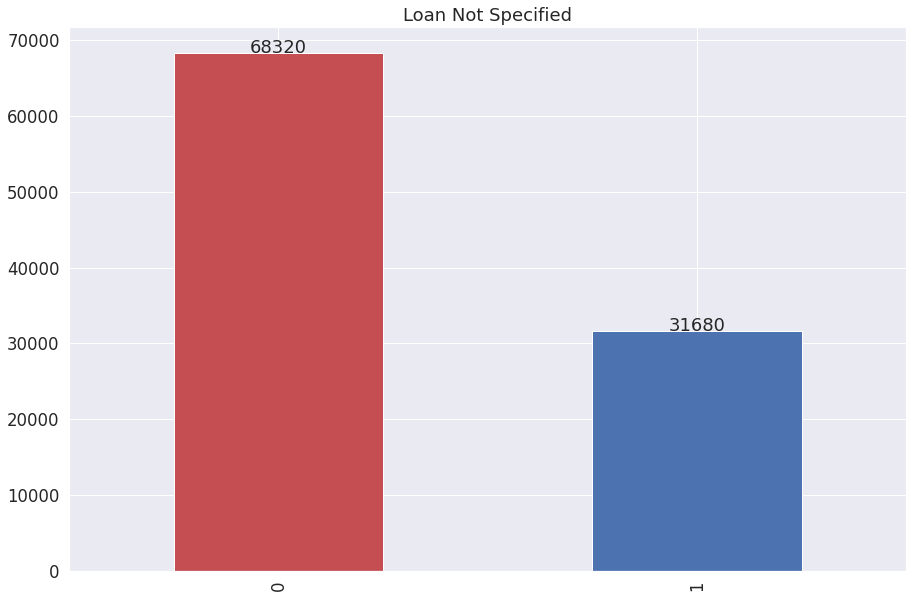

In [51]:
df["Not Specified"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Loan Not Specified")
addlabels(df["Not Specified"].value_counts().index, df["Not Specified"].value_counts().values)

**Payday Loan**

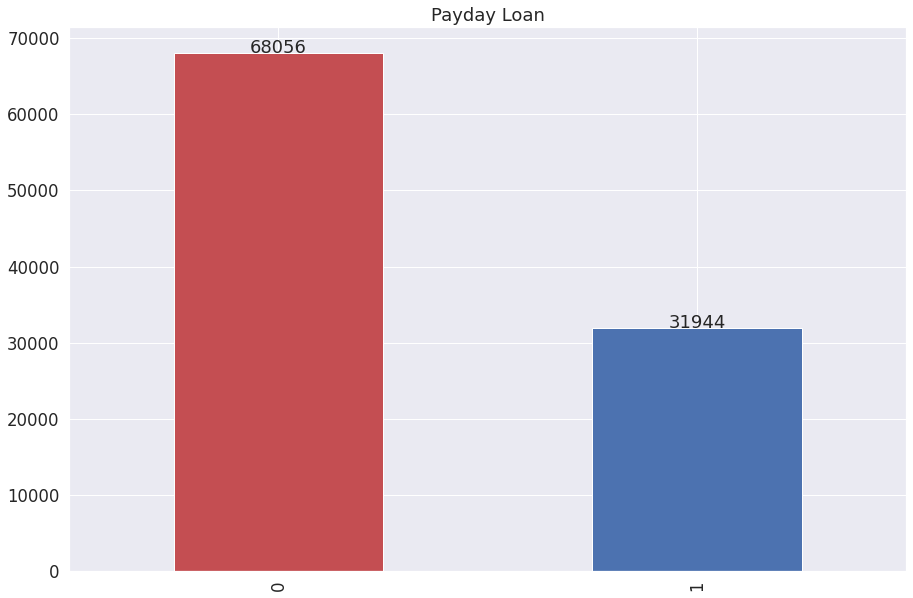

In [52]:
df["Payday Loan"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Payday Loan")
addlabels(df["Payday Loan"].value_counts().index, df["Payday Loan"].value_counts().values)

**Personal Loan**

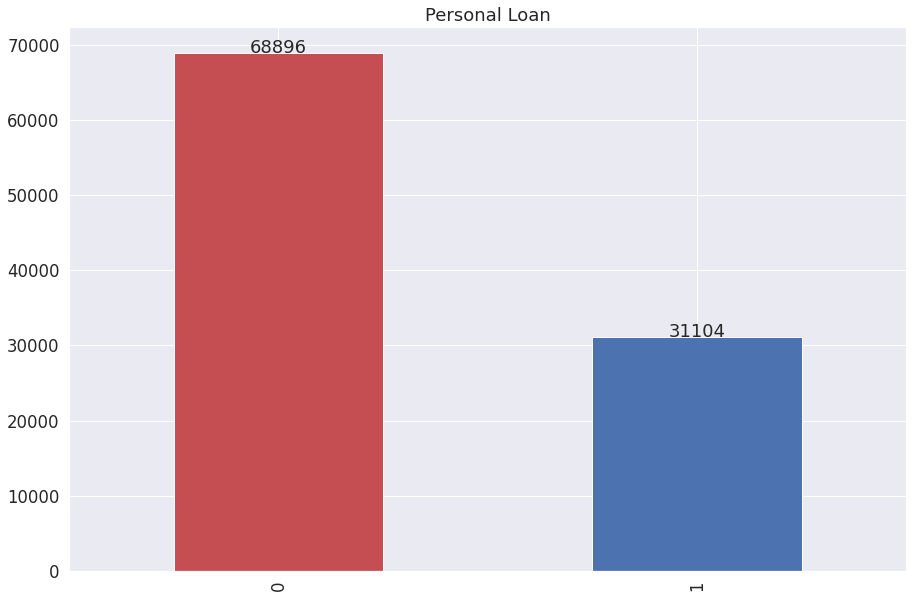

In [53]:
df["Personal Loan"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Personal Loan")
addlabels(df["Personal Loan"].value_counts().index, df["Personal Loan"].value_counts().values)

**Student Loan**

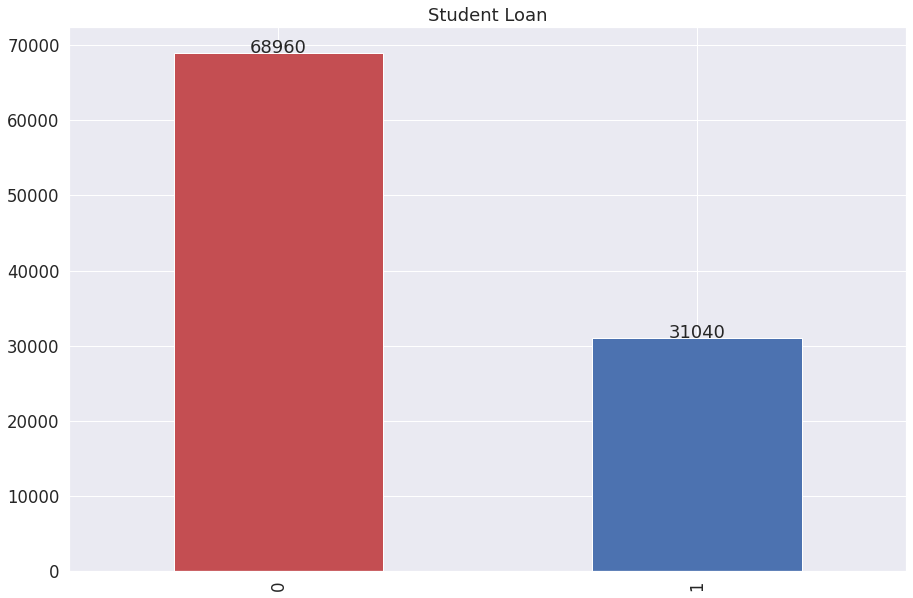

In [54]:
df["Student Loan"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Student Loan")
addlabels(df["Student Loan"].value_counts().index, df["Student Loan"].value_counts().values)

**Delay (Days) from Due Date**

This column attribute has no missing values and judging by the shape of its distribution contain no considerable outliers

In [55]:
df['Delay_from_due_date'].nunique()

73

Skew :  0.966
Kurtosis :  0.348


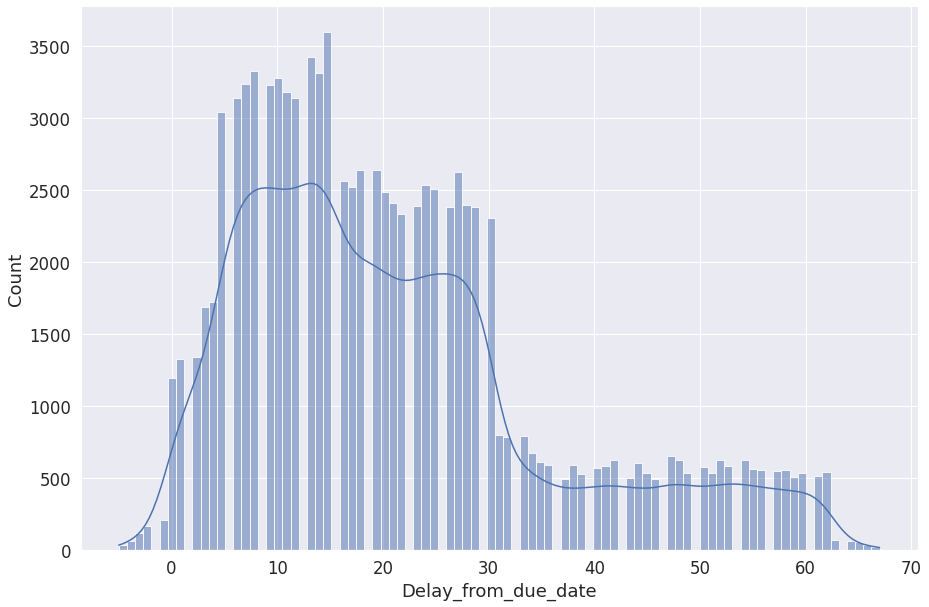

In [56]:
print("Skew : ", '{:1.3f}'.format(df['Delay_from_due_date'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Delay_from_due_date'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Delay_from_due_date'], kde=True, ax=ax)
plt.show()

**Number of Delayed Payments**

The 'Num_of_Delayed_Payment' attribute is another special case where it is not fully dependent on the customer ID but contains missing values and quiet a significant amount of outliers. The outlier values will be filtered out and replaced with a null value before being filled in by the mode value of the subset of the column that share the same customer ID value

In [57]:
df['Num_of_Delayed_Payment'].nunique()

711

In [58]:
def outlier_to_na(data):
  df_temp = data.copy()
  Q1 = np.percentile(df_temp['Num_of_Delayed_Payment'], 25, interpolation = 'midpoint')
  Q3 = np.percentile(df_temp['Num_of_Delayed_Payment'], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  df_temp[df_temp['Num_of_Delayed_Payment'] >= (Q1-1.5*IQR)]['Num_of_Delayed_Payment'] = None
  df_temp[df_temp['Num_of_Delayed_Payment'] <= (Q3+1.5*IQR)]['Num_of_Delayed_Payment'] = None
  return df_temp

df = outlier_to_na(df)
df_test = outlier_to_na(df_test)

In [59]:
df['Num_of_Delayed_Payment'] = df.groupby(['Customer_ID'], sort=False)['Num_of_Delayed_Payment'].apply(lambda x: x.fillna(x.mode().iloc[0]))
vals = df_test.groupby(['Customer_ID'], sort=False)['Num_of_Delayed_Payment'] \
         .transform(lambda x: x.mode(dropna=False).iloc[0])
df_test['Num_of_Delayed_Payment'] = df_test['Num_of_Delayed_Payment'].fillna(vals)

Skew :  14.848
Kurtosis :  233.867


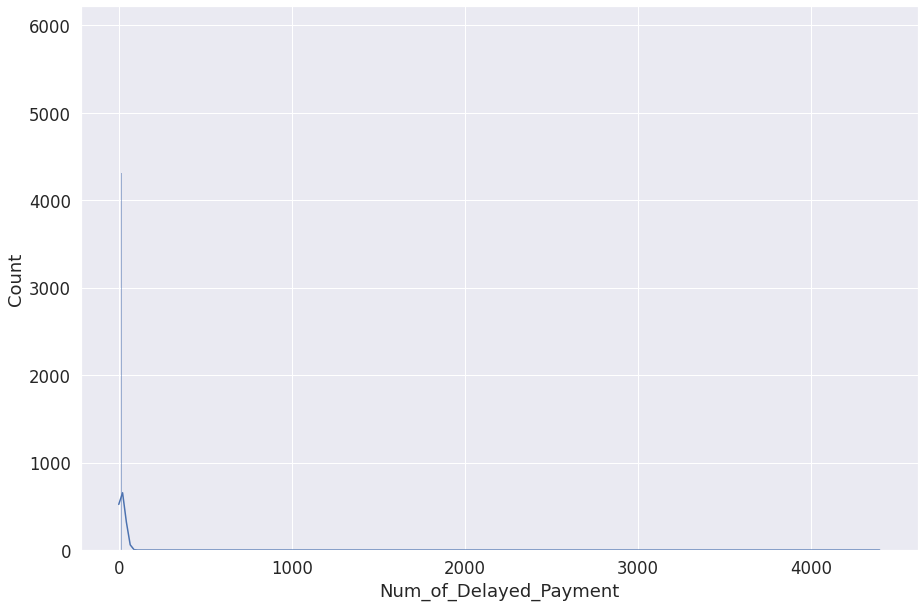

In [60]:
print("Skew : ", '{:1.3f}'.format(df['Num_of_Delayed_Payment'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Num_of_Delayed_Payment'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Num_of_Delayed_Payment'], kde=True, ax=ax)
plt.show()

**Changed Credit Limit**

Credit limit is correlated with the client's credit utilization in the previous month. Thus another attribute called 'Last_Month_Credit_Utilization_Ratio' is created by shifting the values of the 'Credit_Utilization_Ratio' by one place forward for each unique customer ID and a multivariate imputer is applied on both the 'Last_Month_Credit_Utilization_Ratio' and the 'Change_Credit_Limit' attributes to fill in the missing values. The multivariate imputer used in this case is the iterative imputer 

In [61]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_charged_credit_limit(data):
  df_temp = data.copy()
  X = data[['Changed_Credit_Limit','Last_Month_Credit_Utilization_Ratio']].copy()
  iter_impute = IterativeImputer()
  df_temp[['Changed_Credit_Limit','Last_Month_Credit_Utilization_Ratio']] = iter_impute.fit_transform(X)
  return df_temp
  
df['Last_Month_Credit_Utilization_Ratio'] = df.groupby(['Customer_ID'], sort=False)['Credit_Utilization_Ratio'].apply(lambda x: x.shift())
df_test['Last_Month_Credit_Utilization_Ratio'] = df_test.groupby(['Customer_ID'], sort=False)['Credit_Utilization_Ratio'].apply(lambda x: x.shift())

df = impute_charged_credit_limit(df)
df_test = impute_charged_credit_limit(df_test)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value e

Skew :  0.646
Kurtosis :  0.167


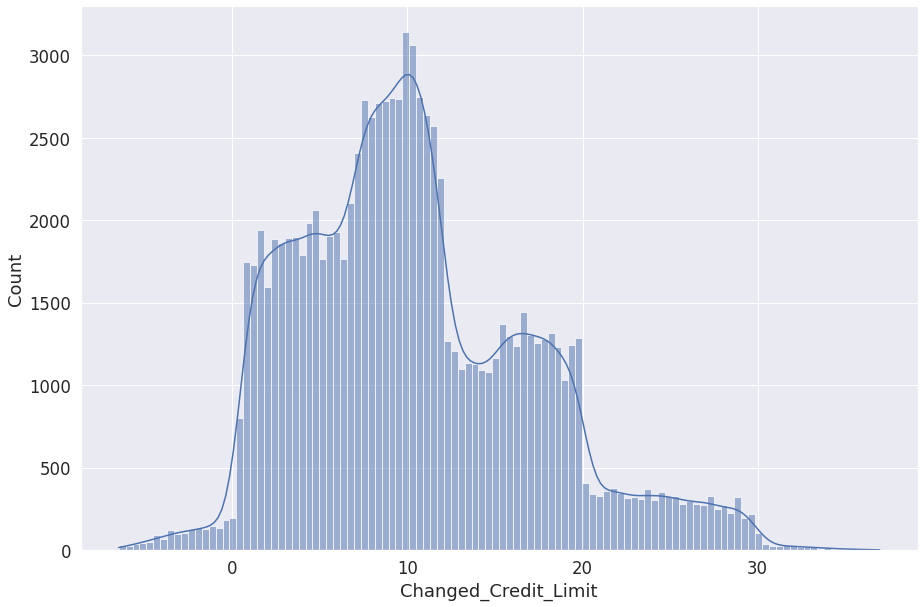

In [62]:
print("Skew : ", '{:1.3f}'.format(df['Changed_Credit_Limit'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Changed_Credit_Limit'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Changed_Credit_Limit'], kde=True, ax=ax)
plt.show()

**Number of Credit Inquiries**

The 'Num_Credit_Inquiries' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset

In [63]:
df['Num_Credit_Inquiries'] = df.groupby(['Customer_ID'], sort=False)['Num_Credit_Inquiries'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Num_Credit_Inquiries'] = df_test.groupby(['Customer_ID'], sort=False)['Num_Credit_Inquiries'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))

In [64]:
df['Num_Credit_Inquiries'].nunique()

18

Skew :  0.416
Kurtosis :  -0.613


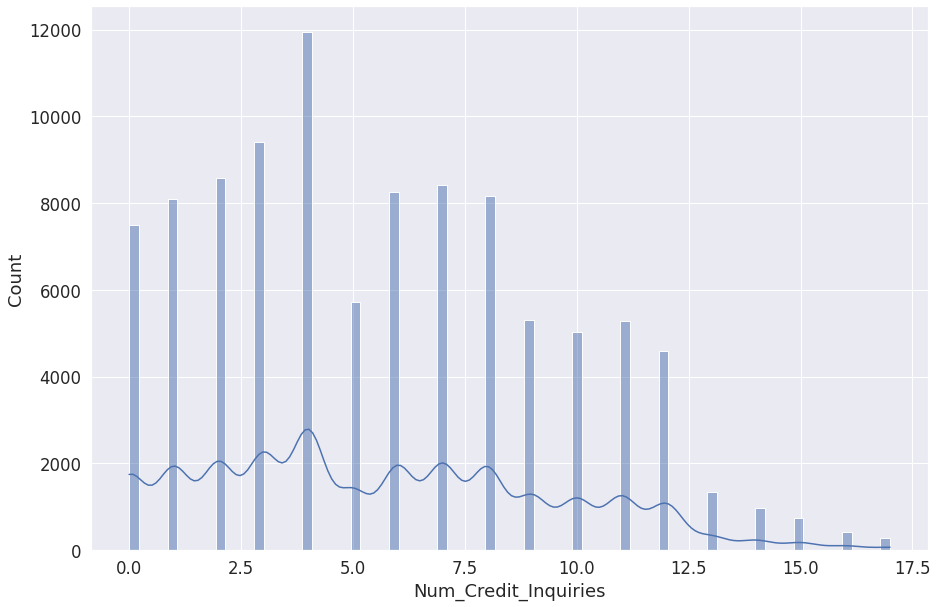

In [65]:
print("Skew : ", '{:1.3f}'.format(df['Num_Credit_Inquiries'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Num_Credit_Inquiries'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Num_Credit_Inquiries'], kde=True, ax=ax)
plt.show()

**Credit Mix**

The 'Credit_Mix' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset

In [66]:
df['Credit_Mix'] = df.groupby(['Customer_ID'], sort=False)['Credit_Mix'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Credit_Mix'] = df_test.groupby(['Customer_ID'], sort=False)['Credit_Mix'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))

In [67]:
df['Credit_Mix'].value_counts()

Standard    45304
Good        30136
Bad         23512
_            1048
Name: Credit_Mix, dtype: int64

In [68]:
df['Credit_Mix'].replace("_","Unknown",inplace=True)
df_test['Credit_Mix'].replace("_","Unknown",inplace=True)

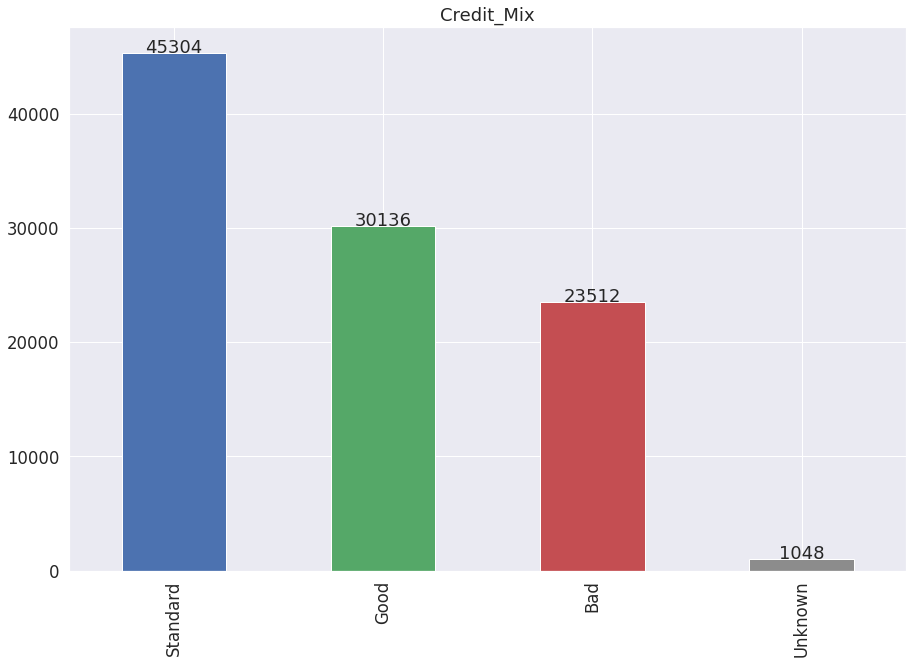

In [69]:
df["Credit_Mix"].value_counts().plot(kind='bar', color=['C0', 'C2', 'C3', 'C7'], figsize=(15, 10))
plt.title("Credit_Mix")
addlabels(df["Credit_Mix"].value_counts().index, df["Credit_Mix"].value_counts().values)

**Outstanding Debt**

Skew :  1.208
Kurtosis :  0.905


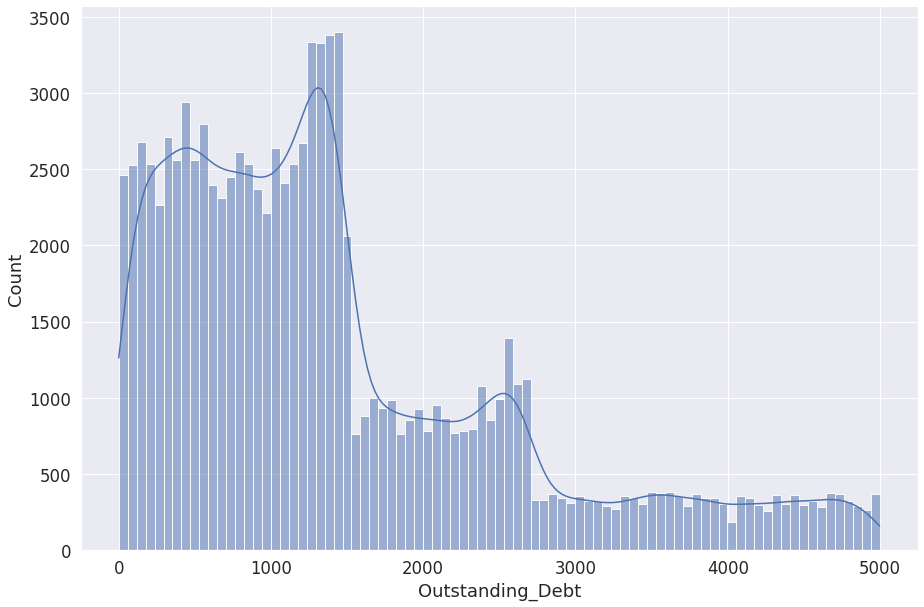

In [70]:
print("Skew : ", '{:1.3f}'.format(df['Outstanding_Debt'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Outstanding_Debt'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Outstanding_Debt'], kde=True, ax=ax)
plt.show()

**Credit Utilization Ratio**

Skew :  0.029
Kurtosis :  -0.944


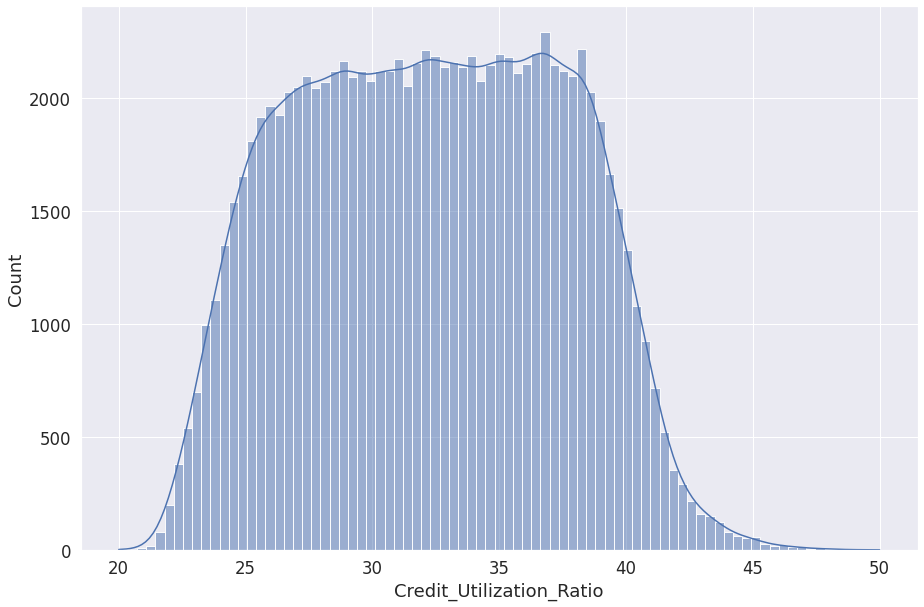

In [71]:
print("Skew : ", '{:1.3f}'.format(df['Credit_Utilization_Ratio'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Credit_Utilization_Ratio'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Credit_Utilization_Ratio'], kde=True, ax=ax)
plt.show()

**Credit History Age**

The credit history age attribute specifies how long since clients opened their very first line of credit. This is another case of a problematic column where it is listed as a column with an object class instead of a numeric class. The credit history age column specifies a data entry's credit history age in terms of years and months when it is much preferred for it to be listed simply as months (as it is with most cases in credit risk modelling tasks). With a combination of string split methods and arithmetic formula to eventually convert this attribute  to a numeric attribute containing the value of the credit history age of a data entry in months, the missing values that is present in this attribute is then filled using linear interpolation:

In [72]:
import scipy.interpolate
import string

def split_credit_history_age(data):
  df_temp = data.copy()
  df_temp[['Years','Months']] = df_temp['Credit_History_Age'].str.split(" Years and ",expand = True)
  df_temp[['Num_Months','Months_']] = df_temp['Months'].str.split(" ",expand = True)
  df_temp.drop(['Months','Months_'],axis=1,inplace=True)
  df_temp[['Years','Num_Months']]  = df_temp[['Years','Num_Months']].astype(float)
  df_temp['Credit_History_Age'] = 12*df_temp['Years'] + df_temp['Num_Months']
  df_temp.drop(['Years','Num_Months'],axis=1,inplace=True)
  return df_temp

df = split_credit_history_age(df)
df['Credit_History_Age'] = df.groupby(['Customer_ID'], sort=False)['Credit_History_Age'].apply(lambda x: x.interpolate(method='linear',limit_direction='both'))

df_test = split_credit_history_age(df_test)
df_test['Credit_History_Age'] = df_test.groupby(['Customer_ID'], sort=False)['Credit_History_Age'].apply(lambda x: x.interpolate(method='linear',limit_direction='both'))

Skew :  -0.049
Kurtosis :  -0.902


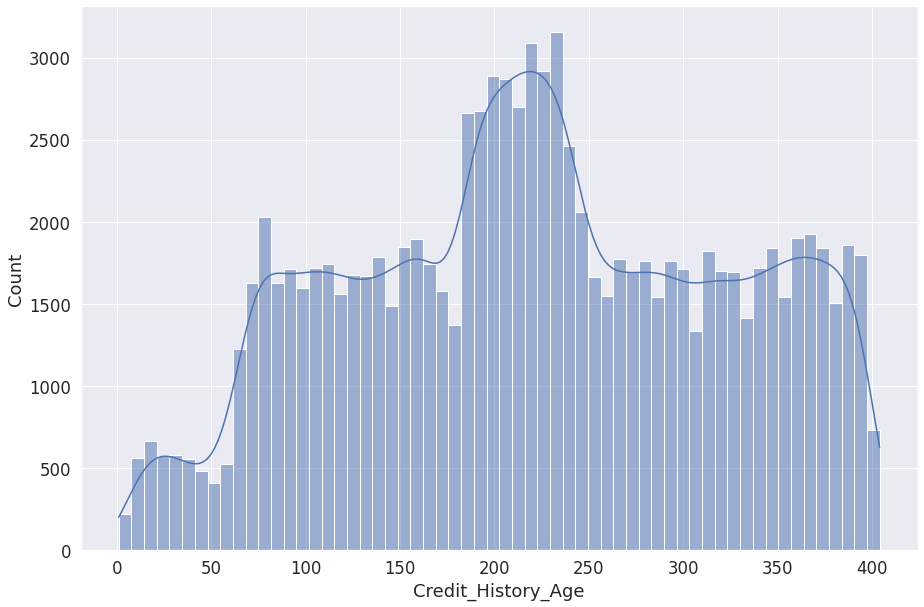

In [73]:
print("Skew : ", '{:1.3f}'.format(df['Credit_History_Age'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Credit_History_Age'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Credit_History_Age'], kde=True, ax=ax)
plt.show()

**Payment of Min Amount**

The 'Payment_of_Min_Amount' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset

In [74]:
df['Payment_of_Min_Amount'] = df.groupby(['Customer_ID'], sort=False)['Payment_of_Min_Amount'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Payment_of_Min_Amount'] = df_test.groupby(['Customer_ID'], sort=False)['Payment_of_Min_Amount'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))

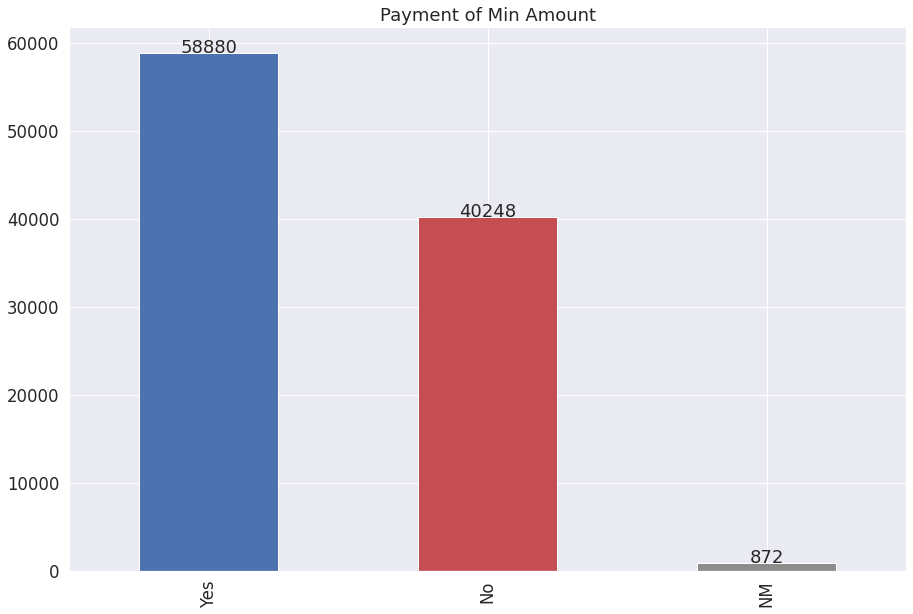

In [75]:
df["Payment_of_Min_Amount"].value_counts().plot(kind='bar', color=['C0', 'C3', 'C7'], figsize=(15, 10))
plt.title("Payment of Min Amount")
addlabels(df["Payment_of_Min_Amount"].value_counts().index, df["Payment_of_Min_Amount"].value_counts().values)

**Total EMI per month**

The 'Total_EMI_per_month' column is fully dependent on the 'Customer_ID' column and the values of each subset of this column that shares the same customer ID value is replaced by the mode value of the subset

In [76]:
df['Total_EMI_per_month'] = df.groupby(['Customer_ID'], sort=False)['Total_EMI_per_month'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))
df_test['Total_EMI_per_month'] = df_test.groupby(['Customer_ID'], sort=False)['Total_EMI_per_month'].apply(lambda x: remove_nonmode(x).fillna(x.mode().iloc[0]))

Skew :  3.842
Kurtosis :  28.762


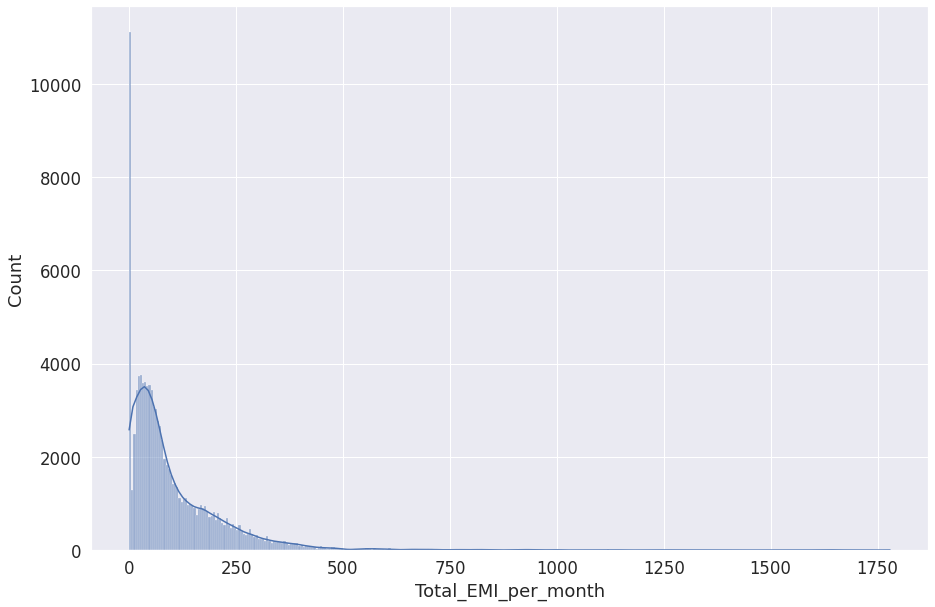

In [77]:
print("Skew : ", '{:1.3f}'.format(df['Total_EMI_per_month'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Total_EMI_per_month'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Total_EMI_per_month'], kde=True, ax=ax)
plt.show()

**Amount invested monthly**

The amount invested monthly column and monthly balance column contains missing values and are not partially dependent to the primary key nor are they fully dependent to any other attribute in the dataset. These numeric value attributes missing values should ideally be replaced by their respective column's subset median value for each distinct customer ID group:

In [78]:
df['Amount_invested_monthly'] = df.groupby(['Customer_ID'], sort=False)['Amount_invested_monthly'].apply(lambda x: x.fillna(x.median()))
df_test['Amount_invested_monthly'] = df_test.groupby(['Customer_ID'], sort=False)['Amount_invested_monthly'].apply(lambda x: x.fillna(x.median()))

Skew :  4.436
Kurtosis :  17.876


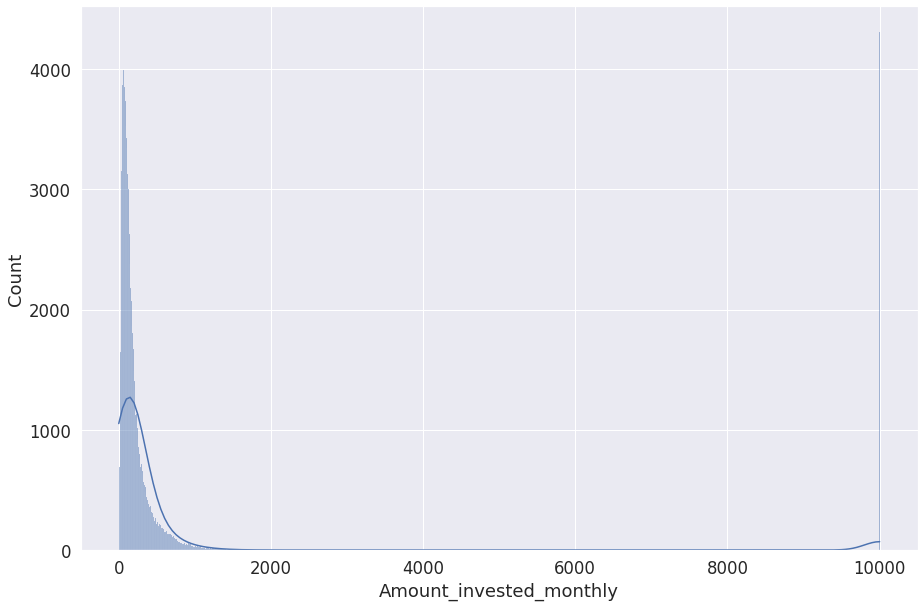

In [79]:
print("Skew : ", '{:1.3f}'.format(df['Amount_invested_monthly'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Amount_invested_monthly'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Amount_invested_monthly'], kde=True, ax=ax)
plt.show()

###**Payment Behaviour**

The payment behaviour attribute describes the nature of payments made using the current line of credit. Some credit lines can be used to purchase small, medium or large sums of payment and depending on how often such payments are made could also be grouped as either low or high frequency payments. This is a case of a column that is not partially dependent on the ID column but contains anomalies. The anomalous values are treated by replacing them with missing values and then filling the values by means of an aggregate approach using the mode value of the payment behaviour column subset that has the same customer ID value:

In [80]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [81]:
def split_payment_behaviour(data):
  df_temp = data.copy()
  df_temp[['Payment_Behaviour_Spending','Payment_Behaviour_Value']] = df_temp['Payment_Behaviour'].str.split("_spent_",expand = True)
  df_temp[['Payment_Behaviour_Value','val']] = df_temp['Payment_Behaviour_Value'].str.split("_value_payments",expand = True)
  df_temp.drop(['Payment_Behaviour','val'],axis=1,inplace=True)
  df_temp['Payment_Behaviour_Spending'] = df_temp.groupby(['Customer_ID'], sort=False)['Payment_Behaviour_Spending'].apply(lambda x: x.fillna(x.mode().iloc[0]))
  df_temp['Payment_Behaviour_Value'] = df_temp.groupby(['Customer_ID'], sort=False)['Payment_Behaviour_Value'].apply(lambda x: x.fillna(x.mode().iloc[0]))
  return df_temp

df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8",None)
df['Payment_Behaviour'] = df.groupby(['Customer_ID'], sort=False)['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df = split_payment_behaviour(df)

df_test['Payment_Behaviour'] = df_test['Payment_Behaviour'].replace("!@9#%8",None)
df_test['Payment_Behaviour'] = df_test.groupby(['Customer_ID'], sort=False)['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df_test = split_payment_behaviour(df_test)

**Payment Behaviour Spending**

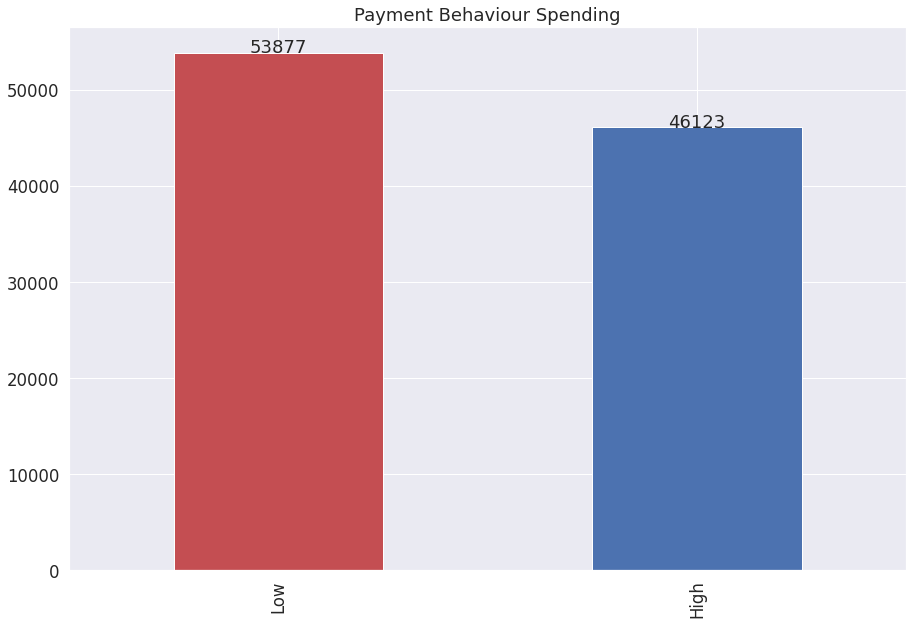

In [82]:
df["Payment_Behaviour_Spending"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Payment Behaviour Spending")
addlabels(df["Payment_Behaviour_Spending"].value_counts().index, df["Payment_Behaviour_Spending"].value_counts().values)

**Payment Behaviour Value**

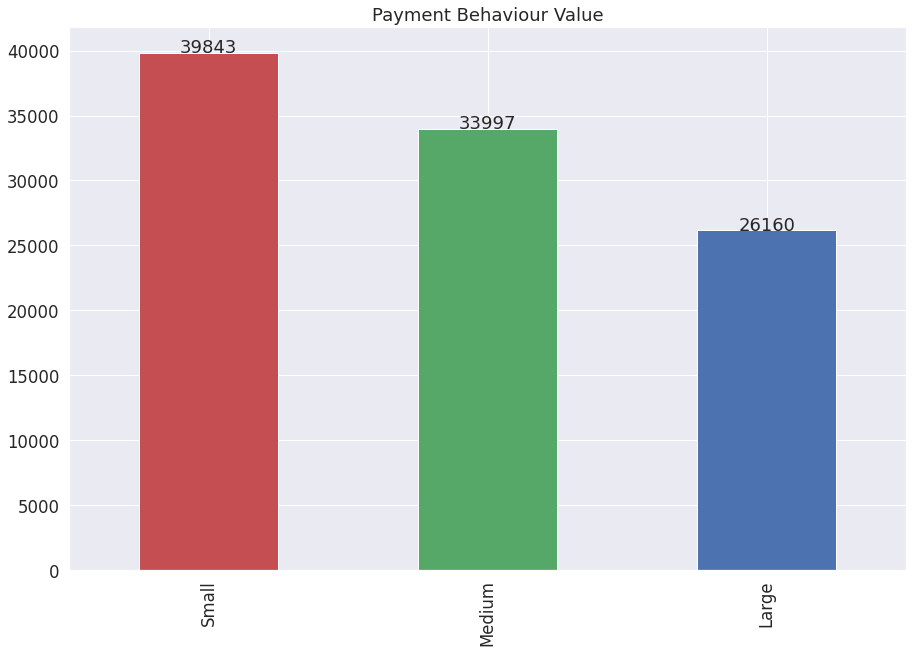

In [83]:
df["Payment_Behaviour_Value"].value_counts().plot(kind='bar', color=['C3', 'C2', 'C0'], figsize=(15, 10))
plt.title("Payment Behaviour Value")
addlabels(df["Payment_Behaviour_Value"].value_counts().index, df["Payment_Behaviour_Value"].value_counts().values)

**Monthly Balance**

In [84]:
df['Monthly_Balance'] = df.groupby(['Customer_ID'], sort=False)['Monthly_Balance'].apply(lambda x: x.fillna(x.median()))
df_test['Monthly_Balance'] = df_test.groupby(['Customer_ID'], sort=False)['Monthly_Balance'].apply(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Skew :  1.585
Kurtosis :  2.897


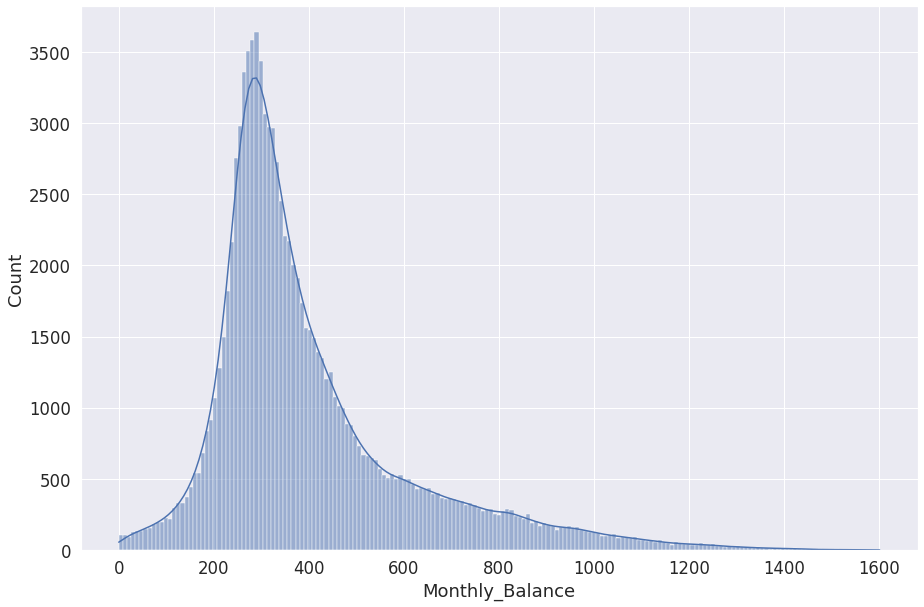

In [85]:
print("Skew : ", '{:1.3f}'.format(df['Monthly_Balance'].skew()))
print("Kurtosis : ", '{:1.3f}'.format(df['Monthly_Balance'].kurtosis()))

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['Monthly_Balance'], kde=True, ax=ax)
plt.show()

**Months Since Deliquency**

In order to be able to calculate this component of the partial model FICO Score, an new feature in the dataset called 'Months_Since_Delinquency' should be created first:

In [86]:
import itertools

def months_deliquent(x):
  yield 0
  cons = 0
  for i in x[:-1]:
    if i == 0:
      cons += 1
    else:
      cons = 0
    yield cons

months_since_deliquency = list(df.groupby(['Customer_ID'], sort=False)['Delay_from_due_date'].apply(lambda x: list(months_deliquent(x))))
df['Monthly_Since_Deliquency'] = list(itertools.chain(*months_since_deliquency))

months_since_deliquency_test = list(df_test.groupby(['Customer_ID'], sort=False)['Delay_from_due_date'].apply(lambda x: list(months_deliquent(x))))
df_test['Monthly_Since_Deliquency'] = list(itertools.chain(*months_since_deliquency_test))

By referencing the 'Delay_from_due_date' column, the months since deinquency column is created using the months_delinquent() user-defined function which returns a list containing a count of consequtive zeros of a list. The logic behind this is the count of zeros from the delay from due date column (which is the average days for payment delays for a client in that particular month) corresponds to how long that client has since been loan delinquent. Because if the average payment delay for a month is equal to zero, then the client has not been late for any credit repayments for that month and hence no record of being loan delinquent for that particular month. Clients who has no record of being loan delinquent, which in this case could be defined as a customer ID which has a value of zero for all of its 'Delay_from_due_date' column values is then assigned a value of -1 in the new attribute:

In [87]:
def new_months_since_deliquency(x):
  if x.is_monotonic_increasing and (x.nunique() == len(list(x))):
    new = [-1 for i in range(len(list(x)))]
  else:
    new = list(x)
  return new

nmsd = list(df.groupby(['Customer_ID'], sort=False)['Monthly_Since_Deliquency'].apply(lambda x: new_months_since_deliquency(x)))
df.drop('Monthly_Since_Deliquency',axis=1,inplace=True)
df['Monthly_Since_Deliquency'] = list(itertools.chain(*nmsd))

nmsd_test = list(df_test.groupby(['Customer_ID'], sort=False)['Monthly_Since_Deliquency'].apply(lambda x: new_months_since_deliquency(x)))
df_test.drop('Monthly_Since_Deliquency',axis=1,inplace=True)
df_test['Monthly_Since_Deliquency'] = list(itertools.chain(*nmsd_test))

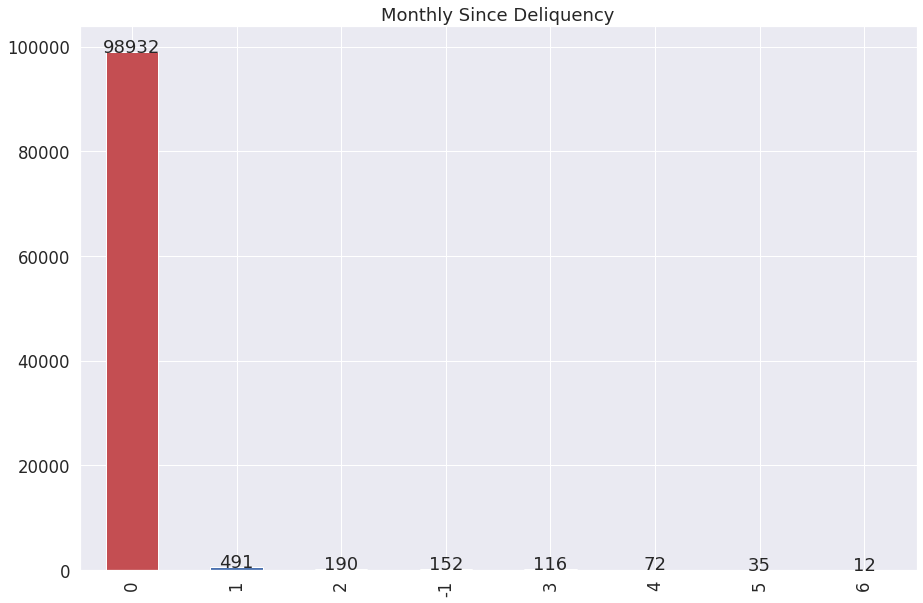

In [88]:
df["Monthly_Since_Deliquency"].value_counts().plot(kind='bar', color=['C3', 'C0', 'C2', 'C1', 'C4', 'C5', 'C6', 'C8'], figsize=(15, 10))
plt.title("Monthly Since Deliquency")
addlabels(df["Monthly_Since_Deliquency"].value_counts().index, df["Monthly_Since_Deliquency"].value_counts().values)

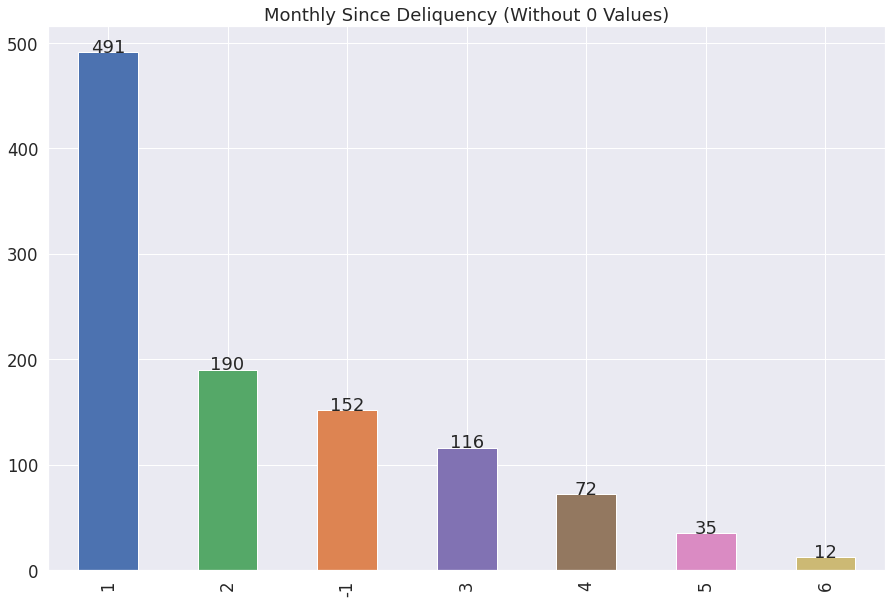

In [89]:
df[df["Monthly_Since_Deliquency"] != 0]["Monthly_Since_Deliquency"].value_counts().plot(kind='bar', color=['C0', 'C2', 'C1', 'C4', 'C5', 'C6', 'C8'], figsize=(15, 10))
plt.title("Monthly Since Deliquency (Without 0 Values)")
addlabels(df[df["Monthly_Since_Deliquency"] != 0]["Monthly_Since_Deliquency"].value_counts().index, df[df["Monthly_Since_Deliquency"] != 0]["Monthly_Since_Deliquency"].value_counts().values)

**Summary**

In [90]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,None,Not Specified,Payday Loan,Personal Loan,Student Loan,Last_Month_Credit_Utilization_Ratio,Monthly_Since_Deliquency
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,33.309240,50505.123449,4197.328114,5.367520,5.532720,14.53208,3.532880,21.068780,29.687860,10.388903,5.677760,1426.220376,32.285173,221.207040,105.543371,617.257610,403.492393,0.31728,0.31040,0.314000,0.313600,0.11408,0.316800,0.319440,0.311040,0.31040,32.275952,0.016020
std,10.764996,38299.422093,3186.918569,2.593321,2.067504,8.74133,2.446356,14.860104,218.027514,6.718366,3.827248,1155.129026,5.116875,99.679734,125.810030,1999.677146,214.423009,0.46542,0.46266,0.464119,0.463958,0.31791,0.465231,0.466262,0.462921,0.46266,4.781952,0.220916
min,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.00000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,20.000000,-1.000000
25%,24.000000,19342.972500,1626.719792,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.420000,3.000000,566.072500,28.052567,144.000000,29.049047,75.356284,270.322511,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,28.664019,0.000000
50%,33.000000,36999.705000,3092.270000,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.550000,5.000000,1166.155000,32.305784,219.000000,66.033915,136.173912,337.270985,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,32.305994,0.000000
75%,42.000000,71683.470000,5958.695625,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.660000,8.000000,1945.962500,36.496663,302.000000,145.582332,263.231662,471.928804,1.00000,1.00000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.00000,35.881210,0.000000
max,56.000000,179987.280000,15204.633333,10.000000,11.000000,34.00000,9.000000,67.000000,4397.000000,36.970000,17.000000,4998.070000,50.000000,404.000000,1779.103254,10000.000000,1602.040519,1.00000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,50.000000,6.000000


# **DATA TRANSFORMATION AND DATA ENGINEERING**

The FICO score is widely used in conventional credit scoring and it could provide new insights for a machine learning based classifier if an attribute that corresponds to it be added as a feature in the training dataset. The FICO Score attribute added to this dataset will be based on the partial model which has five components described as follows:

**Payment History Section Score**

This score component assigns different scores depending on how recent clients have been delinquent on their credit repayments. The longer they have been free since their last loan delinquency the higher their score and even a higher score is awarded to clients who haven't had any history of loan delinquency:
- No history of loan delinquency - 75 points
- 2 years (24 months) or more since last delinquency - 55 points
- 1 year (12 months) up until 2 years since last delinquency - 25 points
- 6 months up until 1 year since last delinquency - 15 points
- Less than 6 months since last delinquency - 20 points

In [91]:
def get_phscore(x):
  if x >= 24:
    phscore = 55
  elif x >= 12:
    phscore = 25
  elif x >= 6:
    phscore = 15
  elif x >= 0:
    phscore = 10
  elif x == -1:
    phscore = 75
  return phscore

**Outstanding Debt Section Score**

This score component corresponds to the amount of average balance on revolving trades (outstanding debt) a client has. The ideal amount for this component would be between zero up until a hundred - anything lower or higher than will receive a lower score:
- 1000 or more- 15 points
- Between 750 up until 1000- 25 points
- Between 500 up until 750 - 40 points
- Between 100 up until 500 - 50 points
- More than 0 up until 100 - 65 points
- Exactly 0 - 55 points
- No revolving trades - 30 points

In [92]:
def get_odscore(x):
  if x >= 1000:
    odscore = 15
  elif x >= 750:
    odscore = 25
  elif x >= 500:
    odscore = 40
  elif x >= 100:
    odscore = 50
  elif x > 0:
    odscore = 65
  elif x == 0:
    odscore = 55
  else:
    odscore = 30
  return odscore

**Credit History Section Score**

This component correlates to the Credit History Age column in the dataset which assigns higher scores to clients who have been on a credit line for a longer period of time:
- More than 4 years (48 months) - 75 points
- Between 2 years up until 4 years - 60 points
- Between 1 year up until 2 years - 35 points
- Less than a year (12 months) - 12 points

In [93]:
def get_chscore(x):
  chscore = 0
  if x >= 48:
    chscore = 75
  elif x >= 24:
    chscore = 60
  elif x >= 12:
    chscore = 35
  elif x < 12:
    chscore = 12
  return chscore

**Pursuit of New Credit Section Score**

This component score corresponds to the number of inquiries for the previous 6 months. The higher the number of inquiries, the lower the score (as inquiries suggest a higher likelihood of loan delinquency):
- 4 or  more- 20 points
- Exactly 3 - 25 points
- Exactly 2 - 45 points
- Exactly 1 - 60 points
- None - 70 points

In [94]:
def get_ncscore(x):
  ncscore = 0
  if x >= 4:
    ncscore = 20
  elif x == 3:
    ncscore = 25
  elif x == 2:
    ncscore = 45
  elif x == 1:
    ncscore = 60
  elif x <= 0:
    ncscore = 75
  return ncscore

**Credit Mix Section Score**

This component awards higher points to clients who have more bankcards on trade lines. The optimal number is 3 and anything above or below that scores lower points:
- 4 or more - 50 points
- Exactly 3 - 60 points
- Exactly 2 - 50 points
- Exactly 1 - 25 points
- None - 15 points

In [95]:
def get_cmscore(x):
  cmscore = 0
  if x >= 4:
    cmscore = 50
  elif x == 3:
    cmscore = 60
  elif x == 2:
    cmscore = 50
  elif x == 1:
    cmscore = 25
  elif x == 0:
    cmscore = 15
  return cmscore

It is a general rule of thumb that including features containing ratio values could give more insight to a predictive model. The debt to income ratio, EMI to income ratio as well as the expenditure to income ratio are created based on this principle:

In [96]:
def feat_eng(data):
  df_temp = data.copy()
  df_temp['Expenditures_To_Income_Ratio'] = 1 - (df['Monthly_Inhand_Salary'] / (df_temp['Annual_Income']/12))
  df_temp['Debt_To_Income_Ratio'] = df_temp['Outstanding_Debt'] / (df_temp['Annual_Income']/12)
  df_temp['EMI_To_Income_Ratio'] = df_temp['Total_EMI_per_month'] / (df_temp['Annual_Income']/12)
  df_temp['PH_Score'] = df_temp['Monthly_Since_Deliquency'].apply(lambda x: get_phscore(x))
  df_temp['OD_Score'] = df_temp['Outstanding_Debt'].apply(lambda x: get_odscore(x))
  df_temp['CH_Score'] = df_temp['Credit_History_Age'].apply(lambda x: get_chscore(x))
  df_temp['NC_Score'] = df_temp['Num_Credit_Inquiries'].apply(lambda x: get_ncscore(x))
  df_temp['CM_Score'] = df_temp['Num_Credit_Card'].apply(lambda x: get_cmscore(x))
  df_temp['FICO_Score'] = df_temp['PH_Score'] + df_temp['OD_Score'] + df_temp['CH_Score'] + df_temp['NC_Score'] + df_temp['CM_Score']
  df_temp.drop(['Last_Month_Credit_Utilization_Ratio','PH_Score','OD_Score','CH_Score','NC_Score','CM_Score'],axis=1,inplace=True)
  df_temp.drop(['ID','Customer_ID','Month','Name','SSN'],axis=1,inplace=True)
  return df_temp

df = feat_eng(df)
df_test = feat_eng(df_test)

**FICO Score Histogram Plots by Credit Score Category**

<Figure size 432x288 with 0 Axes>

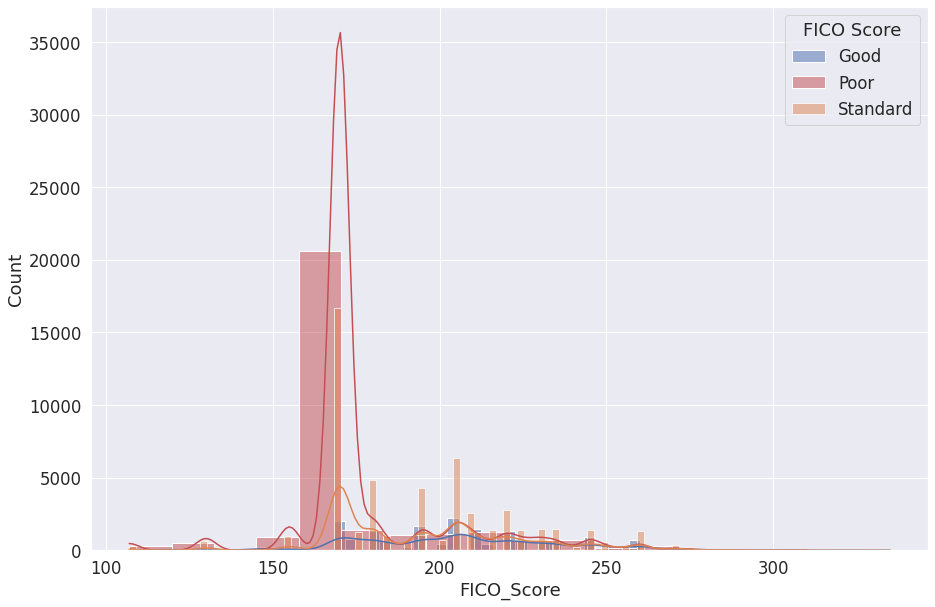

In [97]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df['FICO_Score'][df['Credit_Score']=='Good'], kde = True,
             label = 'Good', color='C0', ax=ax)
sns.histplot(df['FICO_Score'][df['Credit_Score']=='Poor'], kde = True,
             label = 'Poor', color='C3', ax=ax)
sns.histplot(df['FICO_Score'][df['Credit_Score']=='Standard'], kde = True,
             label = 'Standard', color='C1', ax=ax)
plt.legend(title="FICO Score")

# **BIVARIATE ANALYSIS**

when creating a predictive model for classification, the target variable is a categorical feature. Bivariate analysis aims to analyze the relation between attributes (dependent variables) to the target variable or precisely how the variation of the dependent variables contributes to the variation in the target variable.

There are fundamentally three types of bivariate analysis based on the type (categorical or numerical) of features that are being compared, namely bivariate analysis between two categorical attributes, bivariate analysis between two numerical attributes and bivariate analysis between a categorical and a numerical attribute. As previously mentioned, since the target variable in this is categorical, the only bivariate analysis implemented in this case will be between two categorical attributes and between a categorical and numerical attribute.

## **Categorical (Discrete) vs Categorical Target:**

- Chi Squared Test
- Variance of attribute compared to Target Significant?

In [98]:
df_categorical = list(df.drop('Credit_Score',axis=1).select_dtypes(include=['uint8','object']).columns)

In [99]:
import math
import scipy.stats as stats

def chi_sqr(data, target_var, feature_list):
  crit_chi_val = []
  p_val_chi = []
  dof = []
  p_005 = []
  p_001 = []
  cramer_v = []
  for ctg_cols in feature_list:
    tab = pd.crosstab(data[ctg_cols], data[target_var], margins = True)
    n = data[ctg_cols].nunique()
    m = data[target_var].nunique()
    obv = tab.iloc[0:n,0:m]
    crit_chi_val.append(stats.chi2_contingency(observed=obv)[0])
    p_val_chi.append('{:1.8f}'.format(stats.chi2_contingency(observed=obv)[1]))
    dof.append(stats.chi2_contingency(observed=obv)[2])
    if stats.chi2_contingency(observed= obv)[1] < 0.05:
      p_005.append(True)
    else:
      p_005.append(False)
    if stats.chi2_contingency(observed= obv)[1] < 0.01:
      p_001.append(True)
    else:
      p_001.append(False)
    cramer_v.append((stats.chi2_contingency(observed= obv)[0]/(600*min(obv.shape[0],obv.shape[1])))**0.5)
  chi_2 = pd.DataFrame({"Critical Values":crit_chi_val,
                        "P Values":p_val_chi,
                        "Degrees of Freedom":dof, 
                        "p < 0.05?":p_005, 
                        "p < 0.01?":p_001,
                        "Cramer V":cramer_v})
  chi_2.index = feature_list
  chi_2.sort_values('Cramer V', inplace=True, ascending=False)
  return chi_2

chi_sqr(df, "Credit_Score", df_categorical)

,Critical Values,P Values,Degrees of Freedom,p < 0.05?,p < 0.01?,Cramer V
Credit_Mix,40062.211692,0.00000000,6,True,True,4.717710
Payment_of_Min_Amount,22279.747988,0.00000000,4,True,True,3.518187
None,2489.468454,0.00000000,2,True,True,1.440332
Personal Loan,2040.246672,0.00000000,2,True,True,1.303919
Payday Loan,2034.249100,0.00000000,2,True,True,1.302001
Mortgage Loan,2024.106437,0.00000000,2,True,True,1.298751
Credit-Builder Loan,2021.682750,0.00000000,2,True,True,1.297974
Student Loan,1989.624266,0.00000000,2,True,True,1.287641
Debt Consolidation Loan,1974.101141,0.00000000,2,True,True,1.282608
Not Specified,1884.354598,0.00000000,2,True,True,1.253114


## **Numerical (Continuous) vs Categorical Target:**
- ANOVA Test
- Variance between group > variance within group?

In [100]:
df_numerical = list(df.drop('Credit_Score',axis=1).select_dtypes(include=['int64','float64']).columns)

In [101]:
def anova_test(data, target_var, feature_list):
  stat = []
  p_val = []
  p_005 = []
  p_001 = []
  for fl in feature_list:
    frame = pd.DataFrame({"target":data[target_var],
                          "feature":data[fl]})
    groups = frame.groupby("target").groups
    label_group = []
    for labels in groups.keys():
        label_group.append(data[fl][groups[labels]])
    test = stats.f_oneway(*(lg for lg in label_group))
    stat.append(test[0])
    p_val.append('{:1.8f}'.format(test[1]))
    if test[1] < 0.05:
      p_005.append(True)
    else:
      p_005.append(False)
    if test[1] < 0.01:
      p_001.append(True)
    else:
      p_001.append(False)
  chart = pd.DataFrame({"F_Statistic":stat, 
                        "P Values":p_val,
                        "p < 0.05?":p_005, 
                        "p < 0.01?":p_001})
  chart.index = feature_list
  return chart

anova_test(df,'Credit_Score',df_numerical)

,F_Statistic,P Values,p < 0.05?,p < 0.01?
Age,1333.794797,0.00000000,True,True
Annual_Income,2399.806709,0.00000000,True,True
Monthly_Inhand_Salary,2340.602683,0.00000000,True,True
Num_Bank_Accounts,9274.642508,0.00000000,True,True
Num_Credit_Card,9771.833777,0.00000000,True,True
Interest_Rate,15420.276171,0.00000000,True,True
Num_of_Loan,7440.631240,0.00000000,True,True
Delay_from_due_date,11471.888723,0.00000000,True,True
Num_of_Delayed_Payment,5.613260,0.00365030,True,True
Changed_Credit_Limit,2618.251744,0.00000000,True,True


In [102]:
df_test = pd.get_dummies(df_test, columns=['Credit_Mix','Payment_of_Min_Amount','Occupation','Payment_Behaviour_Value','Payment_Behaviour_Spending'],drop_first=True)
df = pd.get_dummies(df, columns=['Credit_Mix','Payment_of_Min_Amount','Occupation','Payment_Behaviour_Value','Payment_Behaviour_Spending'],drop_first=True)
for uint_col in list(df.drop('Credit_Score',axis=1).select_dtypes(include=['uint8']).columns):
  df[uint_col] = df[uint_col].astype(int)
  df_test[uint_col] = df_test[uint_col].astype(int)

# **MODEL BUILDING AND INSIGHT SUMMARY**

In [104]:
from pycaret.classification import *

**Model Setup**

In [105]:
model = setup(data=df, target='Credit_Score', session_id=1948)

,Description,Value
0,session_id,1948
1,Target,Credit_Score
2,Target Type,Multiclass
3,Label Encoded,"Good: 0, Poor: 1, Standard: 2"
4,Original Data,"(100000, 55)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,33
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Credit_Score',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'p

**Train XGBoost Classifier on Training Data**

In [106]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7650,0.8779,0.7502,0.7651,0.7650,0.6094,0.6094
1,0.7624,0.8719,0.7508,0.7631,0.7626,0.6058,0.6059
2,0.7699,0.8834,0.7557,0.7698,0.7698,0.6166,0.6167
3,0.7647,0.8788,0.7530,0.7653,0.7650,0.6104,0.6104
4,0.7656,0.8776,0.7553,0.7660,0.7658,0.6117,0.6117
5,0.7741,0.8826,0.7634,0.7747,0.7744,0.6262,0.6263
6,0.7694,0.8802,0.7566,0.7695,0.7694,0.6166,0.6166
7,0.7676,0.8766,0.7553,0.7682,0.7678,0.6146,0.6147
8,0.7776,0.8841,0.7645,0.7780,0.7777,0.6310,0.6310


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
INFO:logs:create_model() succesfully completed......................................


**Hyperparameter Tuning**

In [107]:
tuned_xgb = tune_model(xgb, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7749,0.8824,0.7596,0.7746,0.7747,0.6245,0.6245
1,0.7797,0.8882,0.7640,0.7794,0.7795,0.6327,0.6328
2,0.7826,0.8880,0.7683,0.7824,0.7824,0.6380,0.6381
3,0.7806,0.8868,0.7644,0.7803,0.7804,0.6335,0.6336
4,0.7789,0.8855,0.7642,0.7786,0.7788,0.6319,0.6319
Mean,0.7794,0.8862,0.7641,0.7790,0.7791,0.6321,0.6322
Std,0.0025,0.0021,0.0028,0.0026,0.0025,0.0044,0.0044


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=130, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
INFO:logs:tune_model() succesfully completed......................................


**Confusion Matrix**

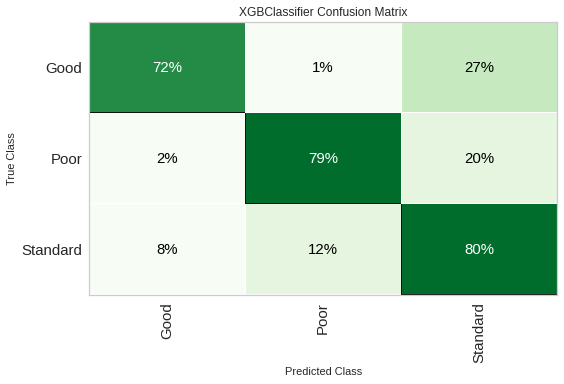

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [114]:
plot_model(tuned_xgb, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

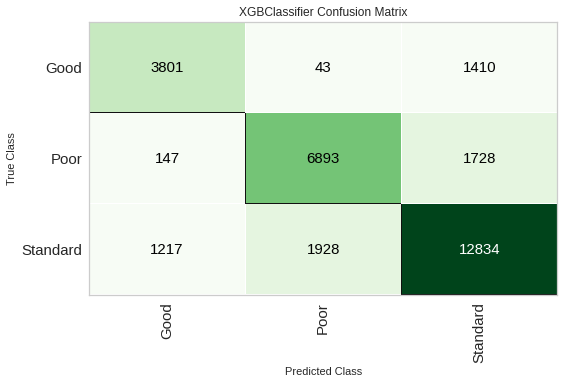

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [115]:
plot_model(tuned_xgb, plot = 'confusion_matrix')

**Parameters After Tuning**

In [108]:
plot_model(tuned_xgb, plot = 'parameter')

,Parameters
objective,multi:softprob
use_label_encoder,None
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,0.9
early_stopping_rounds,None
enable_categorical,False


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


**Class Prediction Error Graph for Tuned Model**

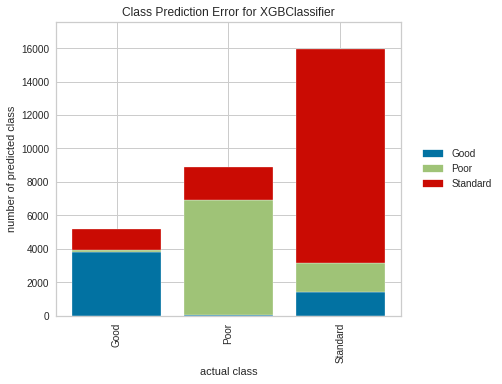

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [109]:
plot_model(tuned_xgb, plot = 'error')

**Classification Report for Tuned Model**

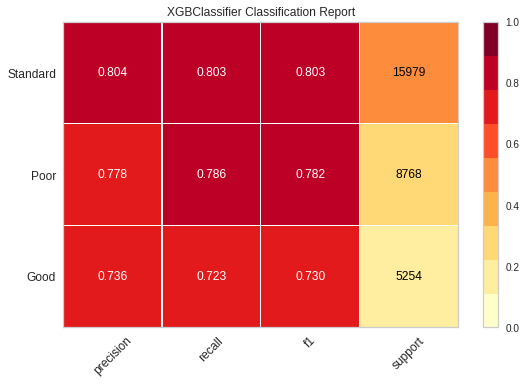

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [110]:
plot_model(tuned_xgb, plot = 'class_report')

**ROC Curve**

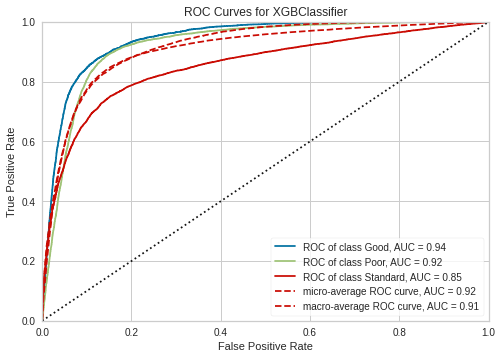

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [111]:
plot_model(tuned_xgb, plot = 'auc')

**Feature Importance Plot (Tuned Model)**

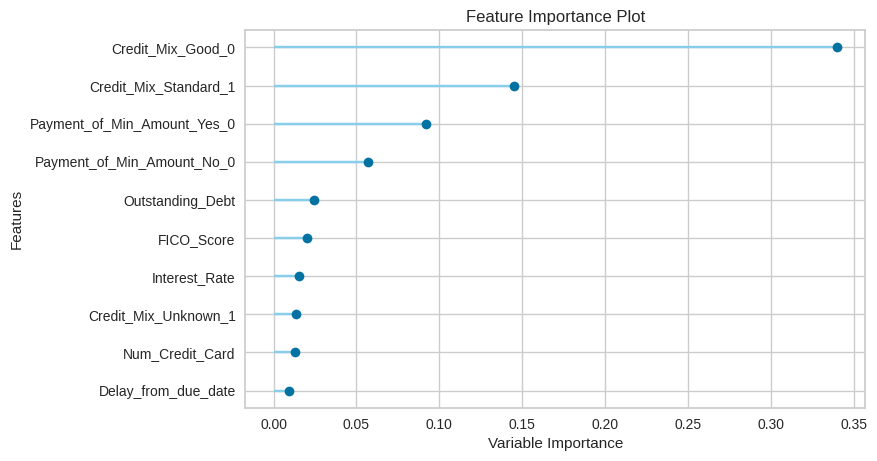

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [122]:
plot_model(tuned_xgb, plot = 'feature')

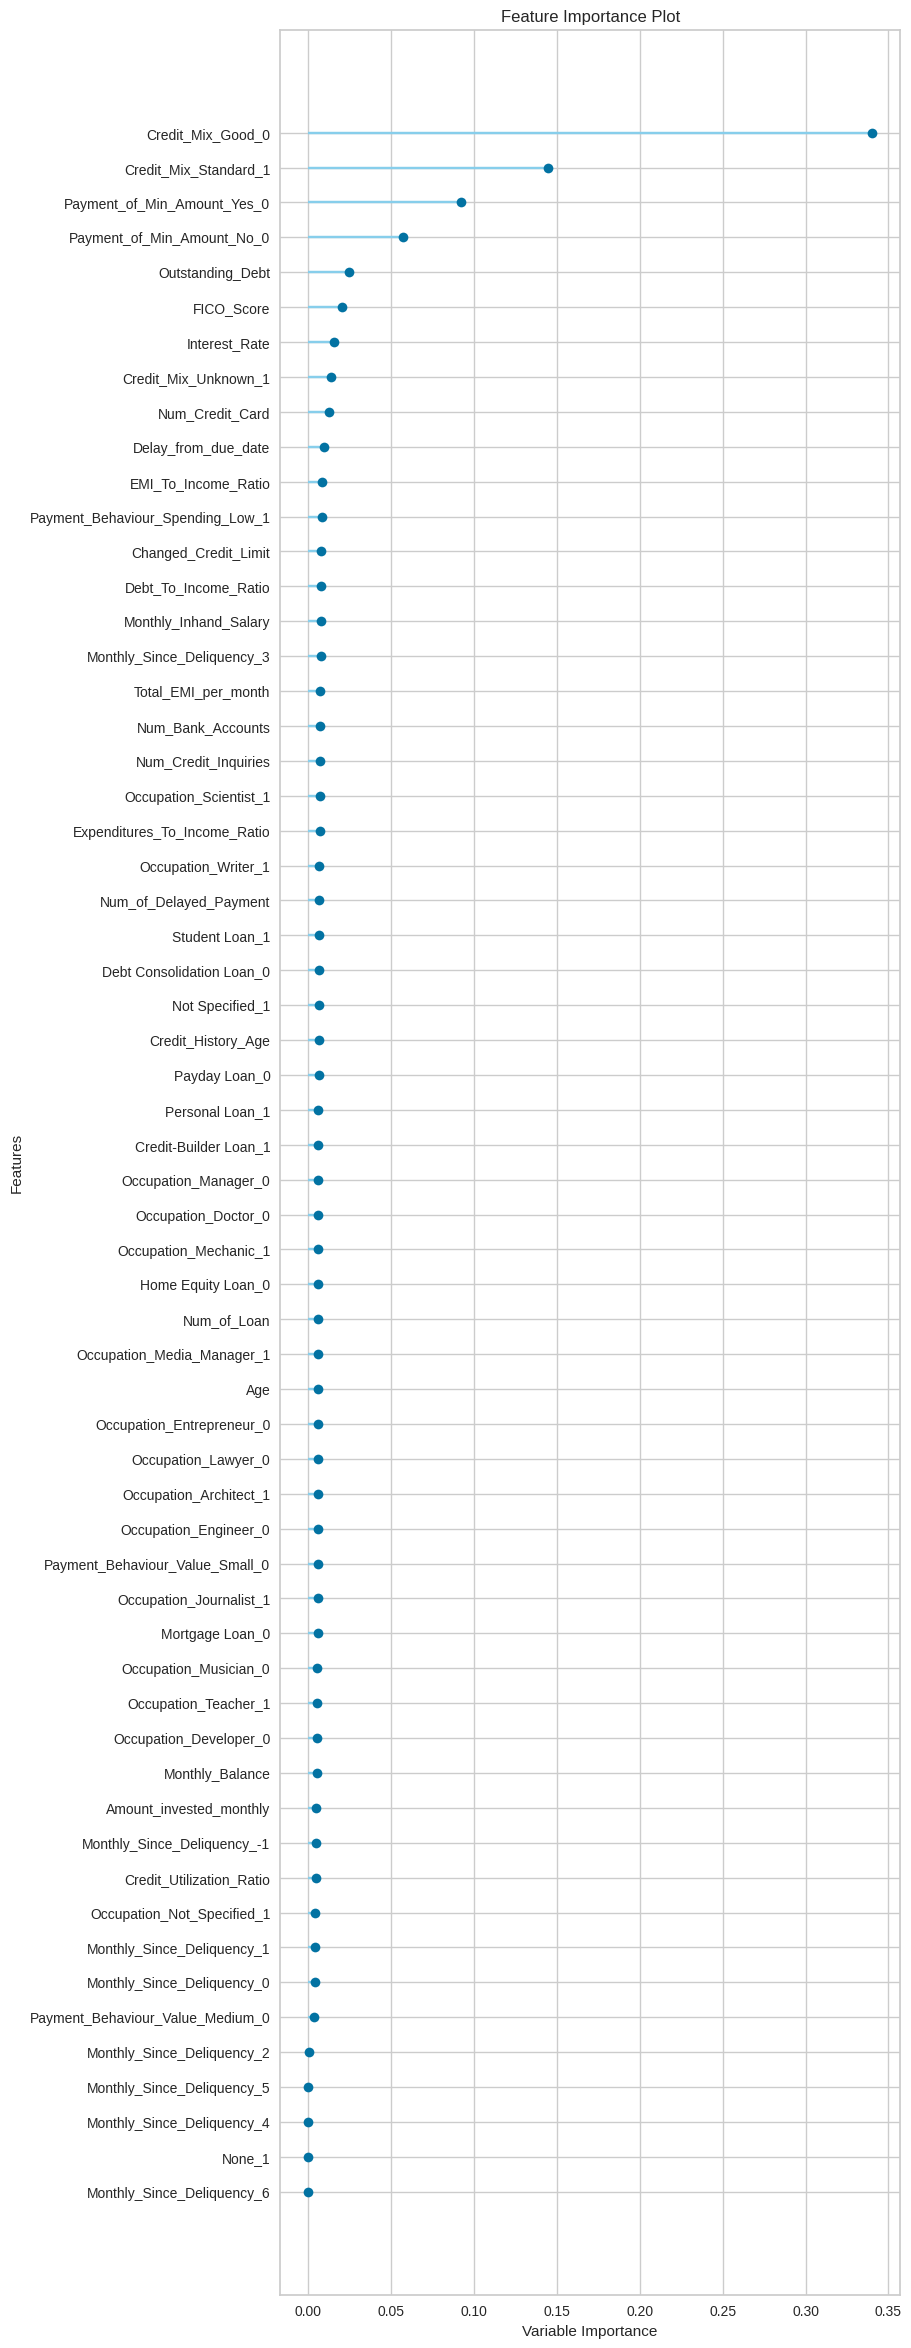

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [112]:
plot_model(tuned_xgb, plot = 'feature_all')

##**Finalized Model**

In [113]:
xgb_final = finalize_model(tuned_xgb)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=130, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing XGBClassifier(base_score=None, b

In [116]:
plot_model(xgb_final, plot = 'parameter')

,Parameters
objective,multi:softprob
use_label_encoder,None
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,0.9
early_stopping_rounds,None
enable_categorical,False


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


**Feature Importance Plot (Finalized Model)**

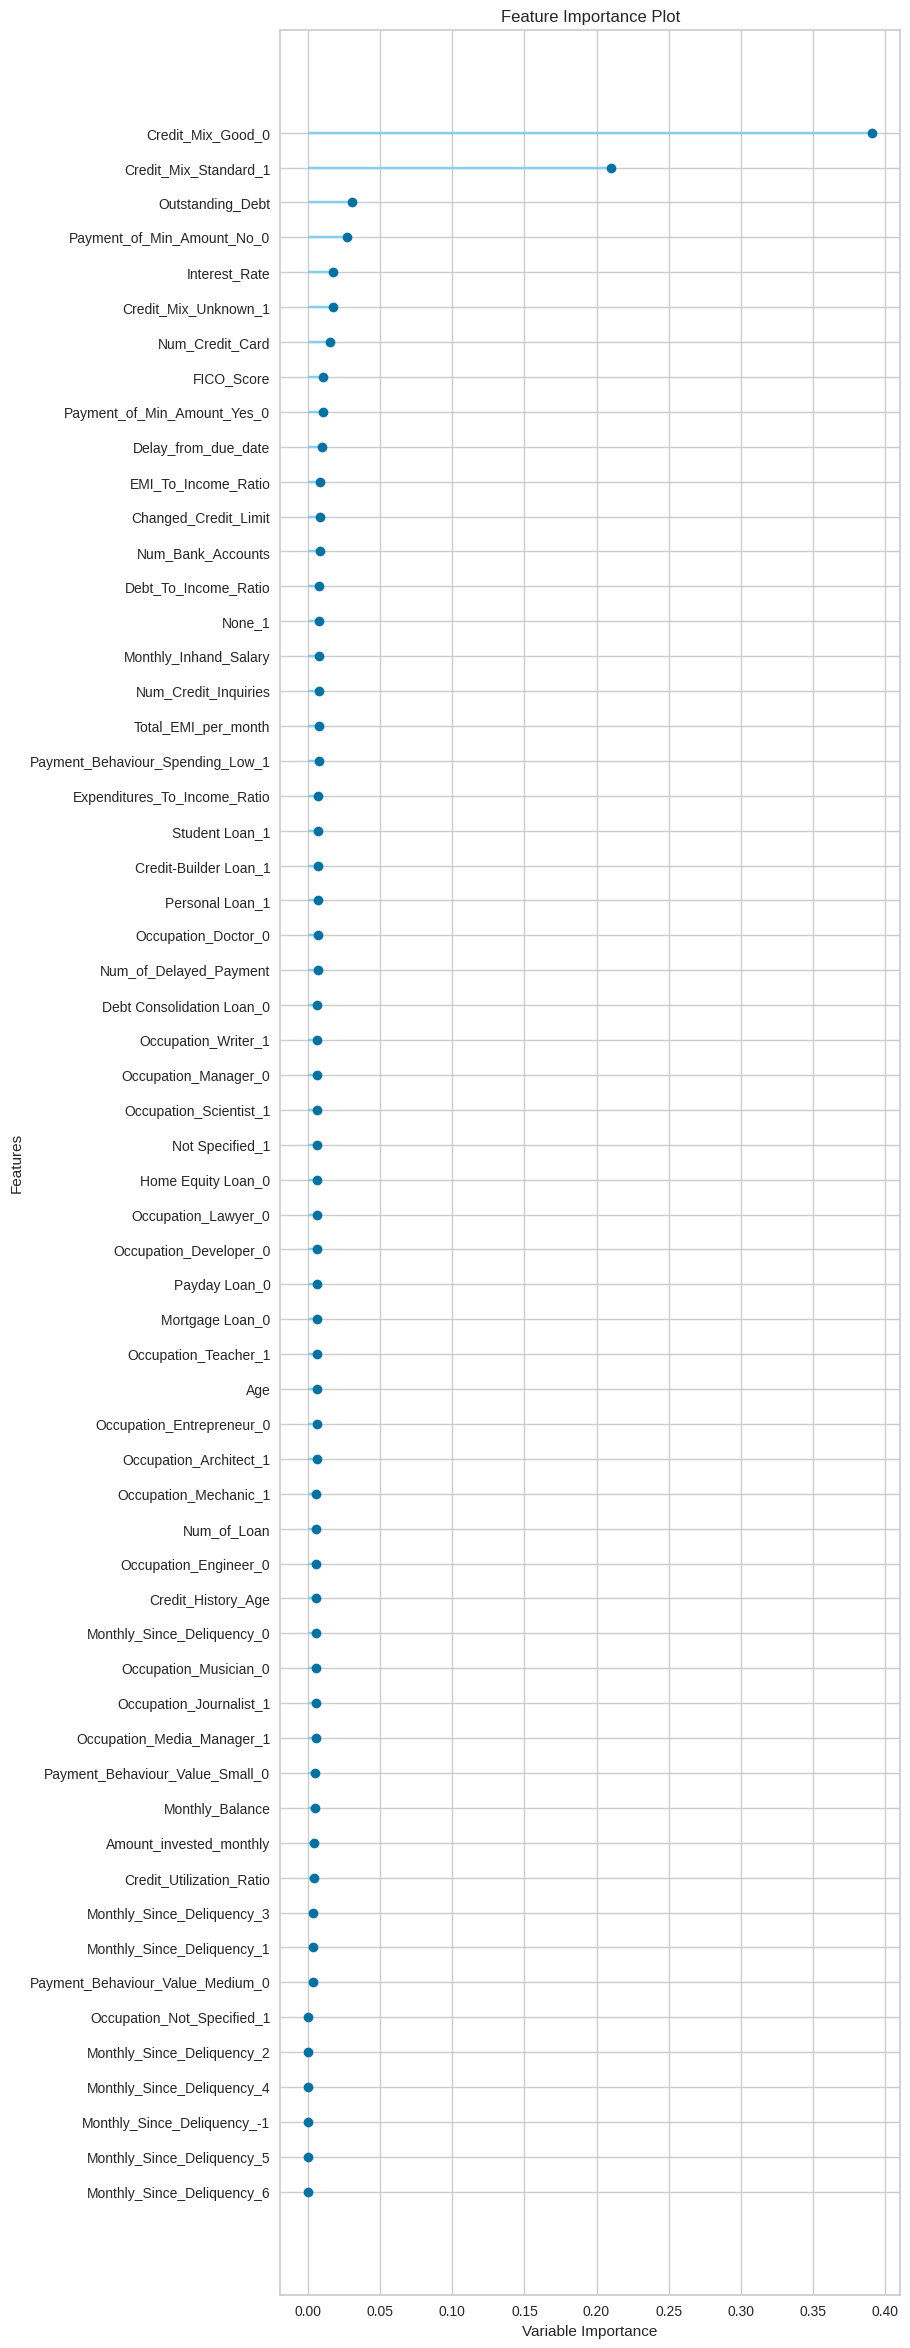

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [117]:
plot_model(xgb_final, plot = 'feature_all')

**Use Finalized Model to Predict Testing Data**

In [118]:
df_predict = predict_model(xgb_final, data = df_test)
df_predict

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=130, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwar

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Not_Specified,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_Value_Medium,Payment_Behaviour_Value_Small,Payment_Behaviour_Spending_Low,Label,Score
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,0,1,0,0,0,1,1,Good,0.8508
2,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,9.0,13.27,...,0,0,1,0,0,1,0,0,Good,0.6456
3,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,12.27,...,0,0,1,0,0,1,0,1,Good,0.8040
4,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,4.0,5.0,11.27,...,0,0,1,0,0,1,0,0,Good,0.8017
5,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,1.0,5.42,...,0,0,0,1,0,0,0,0,Good,0.8312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,29.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,25.0,18.31,...,0,0,0,0,0,0,1,1,Standard,0.7589
49997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,5.0,11.50,...,0,0,0,0,0,0,1,1,Poor,0.7143
49998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,5.0,13.50,...,0,0,0,0,0,0,0,1,Poor,0.6456
49999,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,21.0,6.0,11.50,...,0,0,0,0,0,0,1,0,Poor,0.5754


In [119]:
df_predict.to_csv('predict_result.csv')